In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from neural_editor.seq2seq.train import load_data
import os
import pickle
import pprint
import sys

import torch
from torchtext.data import Dataset

from neural_editor.seq2seq.experiments.OneShotLearning import OneShotLearning
from neural_editor.seq2seq.test_utils import plot_perplexity, load_defects4j_dataset, output_accuracy_on_defects4j
from typing import List

import torch
from torchtext import data
from torchtext.data import Dataset, Field
from torchtext.vocab import Vocab

from neural_editor.seq2seq import EncoderDecoder
from neural_editor.seq2seq.train_config import CONFIG
from neural_editor.seq2seq.train_utils import print_examples, rebatch, calculate_accuracy

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import numpy as np

In [3]:
RESULTS_ROOT = '/home/mikhail/Documents/Development/embeddings-for-code-diffs-data/experiment_2_basic_seq2seq'

In [4]:
train_dataset, val_dataset, test_dataset, diffs_field = load_data(verbose=True)

Data set sizes (number of sentence pairs):
train 46680
valid 5835
test 5835 

First training example:
src: public java.lang.String METHOD_1 ( ) { return new TYPE_1 ( STRING_1 ) . format ( VAR_1 [ ( ( VAR_1 . length ) - 1 ) ] . getTime ( ) ) ; }
trg: public java.lang.String METHOD_1 ( ) { return new TYPE_1 ( STRING_1 ) . format ( VAR_1 [ ( ( type ) - 1 ) ] . getTime ( ) ) ; }
diff_alignment: равенство равенство равенство равенство равенство равенство равенство равенство равенство равенство равенство равенство равенство равенство равенство равенство равенство равенство равенство удаление удаление замена равенство равенство равенство равенство равенство равенство равенство равенство равенство равенство равенство равенство
diff_prev: public java.lang.String METHOD_1 ( ) { return new TYPE_1 ( STRING_1 ) . format ( VAR_1 [ ( ( VAR_1 . length ) - 1 ) ] . getTime ( ) ) ; }
diff_updated: public java.lang.String METHOD_1 ( ) { return new TYPE_1 ( STRING_1 ) . format ( VAR_1 [ ( ( паддинг паддинг

In [5]:
defects4j_dataset, defects4j_classes = load_defects4j_dataset(diffs_field)

In [26]:
model = torch.load(os.path.join(RESULTS_ROOT, 'model.pt'), map_location=torch.device('cpu'))
model.eval()
model.unset_edit_representation()

In [7]:
one_shot_learning_experiment = OneShotLearning(model, diffs_field)

In [8]:
with torch.no_grad():
    one_shot_learning_experiment.conduct(defects4j_dataset, defects4j_classes, 'Defects4J')

Start conducting one shot learning experiment for Defects4J...
Accuracy on Defects4J for same edit representations: 0.0 / 8 = 0.0
Accuracy on Defects4J for other edit representations: 0.0 / 12 = 0.0
Correct Examples
Incorrect Examples
Class: ['condBlockExcAdd']
Golden example (False):
Example #1
Src : public static long METHOD_1 ( long VAR_1 , int VAR_2 ) { switch ( VAR_2 ) { case - 1 : return - VAR_1 ; case 0 : return 0L ; case 1 : return VAR_1 ; } long VAR_3 = VAR_1 * VAR_2 ; if ( VAR_3 / VAR_2 != VAR_1 ) { throw new TYPE_1 ( STRING_1 + VAR_1 + STRING_2 + VAR_2 ) ; } return VAR_3 ; }
Trg : public static long METHOD_1 ( long VAR_1 , int VAR_2 ) { switch ( VAR_2 ) { case - 1 : if ( VAR_1 == VAR_4 ) { throw new TYPE_1 ( STRING_1 + VAR_1 + STRING_2 + VAR_2 ) ; } return - VAR_1 ; case 0 : return 0L ; case 1 : return VAR_1 ; } long VAR_3 = VAR_1 * VAR_2 ; if ( VAR_3 / VAR_2 != VAR_1 ) { throw new TYPE_1 ( STRING_1 + VAR_1 + STRING_2 + VAR_2 ) ; } return VAR_3 ; }
Pred: public static long l

Example #1
Src : public TYPE_1 [ ] METHOD_1 ( int VAR_1 ) throws TYPE_2 { if ( VAR_1 <= 0 ) { throw new TYPE_2 ( VAR_2 , VAR_1 ) ; } final TYPE_1 [ ] out = ( TYPE_1 [ ] ) TYPE_3 . METHOD_2 ( VAR_3 . get ( 0 ) . getClass ( ) , VAR_1 ) ; for ( int i = 0 ; i < VAR_1 ; i ++ ) { out [ i ] = METHOD_1 ( ) ; } return out ; }
Trg : public TYPE_4 [ ] METHOD_1 ( int VAR_1 ) throws TYPE_2 { if ( VAR_1 <= 0 ) { throw new TYPE_2 ( VAR_2 , VAR_1 ) ; } final TYPE_4 [ ] out = new TYPE_4 [ VAR_1 ] ; for ( int i = 0 ; i < VAR_1 ; i ++ ) { out [ i ] = METHOD_1 ( ) ; } return out ; }
Pred: public TYPE_1 [ int int int int int int ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) ) )
+++++++++++++++
Example #1
Src : public static double METHOD_1 ( int [ ] VAR_1 , int [ ] VAR_2 ) { int sum = 0 ; for ( int i = 0 ; i < VAR_1 . length ; i ++ ) { final int VAR_3 = VAR_1 [ i ] - VAR_2

In [7]:
def take_part_from_dataset(dataset, n):
    import torchtext
    return torchtext.data.Dataset(dataset[:n], dataset.fields)

In [18]:
TEST_DATASET_PART_300 = take_part_from_dataset(test_dataset, 300)

In [19]:
TEST_DATASET_PART_25 = take_part_from_dataset(test_dataset, 25)

In [9]:
TRAIN_DATASET_PART_300 = take_part_from_dataset(train_dataset, 300)

In [10]:
TEST_DATASET_PART_300[:2]

In [11]:
def lookup_words(x: np.array, vocab: Vocab) -> List[str]:
    """
    :param x: [SeqLen]
    :param vocab: torchtext vocabulary
    :return: list of words
    """
    return [vocab.itos[i] for i in x]

In [12]:
from neural_editor.seq2seq.decoder.search import perform_search

In [13]:
from neural_editor.seq2seq.decoder.search import get_sequence_with_maximum_probability

In [14]:
from neural_editor.seq2seq.decoder import search

In [15]:
def remove_eos(batch, eos_index: int):
    result = []
    for sequence in batch:
        eos = np.where(sequence == eos_index)[0]
        if eos.shape[0] > 0:
            sequence = sequence[:eos[0]]
        result.append(sequence)
    return result

In [16]:
from tqdm.auto import tqdm

In [279]:
def test_perform_search_2(dataset_to_run, k):
    model.unset_edit_representation()
    with torch.no_grad():
        data_iterator = data.Iterator(dataset_to_run, batch_size=1, sort=False, train=False, shuffle=False, device=CONFIG['DEVICE'])
        correct = 0
        total = 0
        print_first_correct = True
        i = -1
        for batch in tqdm(data_iterator):
            i += 1
            batch = rebatch(1, batch)
            hypothesis = perform_search(model, batch, 60, 2, [3], k, 1, None, False)
            result = get_sequence_with_maximum_probability(hypothesis)
            src = batch.src.cpu().numpy()[0, :]
            trg = batch.trg_y.cpu().numpy()[0, :]

            # remove </s> (if it is there)
            src = src[:-1] if src[-1] == 3 else src
            trg = trg[:-1] if trg[-1] == 3 else trg

            # remove <s> for src
            src = src[1:] if src[0] == 2 else src
            result = remove_eos([result.numpy()], 3)[0]
            if np.all(result == trg) and i != 7:
                correct += 1
                if print_first_correct:
                    print_first_correct = False
                    print("Example #%d" % (i + 1))
                    print("Src : " + " ".join(lookup_words(src, diffs_field.vocab)))
                    print("Trg : " + " ".join(lookup_words(trg, diffs_field.vocab)))
                    print("Pred: " + " ".join(lookup_words(result, diffs_field.vocab)))  
            total += 1
        print(f'Correct: {correct}, total: {total}, acc: {correct / total}')

In [280]:
test_perform_search(TEST_DATASET_PART_300, k=5)

Example #9
Src : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; java.lang.System.out.println ( response ) ; return response . METHOD_3 ( 0 ) ; }
Trg : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }
Pred: public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }

Correct: 50, total: 300, acc: 0.16666666666666666


In [239]:
def test_perform_search(dataset_to_run, k):
    model.unset_edit_representation()
    with torch.no_grad():
        data_iterator = data.Iterator(dataset_to_run, batch_size=1, sort=False, train=False, shuffle=False, device=CONFIG['DEVICE'])
        correct = 0
        total = 0
        print_first_correct = True
        i = -1
        for batch in tqdm(data_iterator):
            i += 1
            batch = rebatch(1, batch)
            hypothesis = perform_search(model, batch, 60, 2, [3], k, 1, None, False)
            result = hypothesis[0][0][0]
            src = batch.src.cpu().numpy()[0, :]
            trg = batch.trg_y.cpu().numpy()[0, :]

            # remove </s> (if it is there)
            src = src[:-1] if src[-1] == 3 else src
            trg = trg[:-1] if trg[-1] == 3 else trg

            # remove <s> for src
            src = src[1:] if src[0] == 2 else src
            result = remove_eos([result.numpy()], 3)[0]
            if np.all(result == trg) and i != 7:
                correct += 1
                if print_first_correct:
                    print_first_correct = False
                    print("Example #%d" % (i + 1))
                    print("Src : " + " ".join(lookup_words(src, diffs_field.vocab)))
                    print("Trg : " + " ".join(lookup_words(trg, diffs_field.vocab)))
                    print("Pred: " + " ".join(lookup_words(result, diffs_field.vocab)))  
            total += 1
        print(f'Correct: {correct}, total: {total}, acc: {correct / total}')

In [219]:
import warnings
warnings.filterwarnings("ignore")

In [220]:
test_perform_search()

Example #9
Src : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; java.lang.System.out.println ( response ) ; return response . METHOD_3 ( 0 ) ; }
Trg : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }
Pred: public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }

Correct: 926, total: 5835, acc: 0.15869751499571552


In [237]:
from neural_editor.seq2seq.train_utils import greedy_decode
def test_greedy_search(dataset_to_run):
    model.unset_edit_representation()
    with torch.no_grad():
        data_iterator = data.Iterator(dataset_to_run, batch_size=1, sort=False, train=False, shuffle=False, device=CONFIG['DEVICE'])
        correct = 0
        total = 0
        print_first_correct = True
        i = -1
        for batch in tqdm(data_iterator):
            i += 1
            batch = rebatch(1, batch)
            result = greedy_decode(model, batch, 60, 2, 3)
            src = batch.src.cpu().numpy()[0, :]
            trg = batch.trg_y.cpu().numpy()[0, :]

            # remove </s> (if it is there)
            src = src[:-1] if src[-1] == 3 else src
            trg = trg[:-1] if trg[-1] == 3 else trg

            # remove <s> for src
            src = src[1:] if src[0] == 2 else src
            result = remove_eos(result, 3)[0]
            if np.all(result == trg):
                correct += 1
                if print_first_correct and i != 7:
                    print_first_correct = False
                    print("Example #%d" % (i + 1))
                    print("Src : " + " ".join(lookup_words(src, diffs_field.vocab)))
                    print("Trg : " + " ".join(lookup_words(trg, diffs_field.vocab)))
                    print("Pred: " + " ".join(lookup_words(result, diffs_field.vocab)))
            total += 1
        print(f'Correct: {correct}, total: {total}, acc: {correct / total}')

In [215]:
test_greedy_search()

Example #9
Src : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; java.lang.System.out.println ( response ) ; return response . METHOD_3 ( 0 ) ; }
Trg : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }
Pred: public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }

Correct: 949, total: 5835, acc: 0.16263924592973436


In [304]:
def test_top_k(dataset_to_run, k):
    model.unset_edit_representation()
    with torch.no_grad():
        data_iterator = data.Iterator(dataset_to_run, batch_size=1, sort=False, train=False, shuffle=False, device=CONFIG['DEVICE'])
        correct = 0
        total = 0
        print_first_correct = True
        i = -1
        for batch in tqdm(data_iterator):
            i += 1
            batch = rebatch(1, batch)
            hypothesis = perform_search(model, batch, 60, 2, [3], k, 1, None, False)
            for hypothes in hypothesis[0][:k]:
                result = hypothes[0]
                src = batch.src.cpu().numpy()[0, :]
                trg = batch.trg_y.cpu().numpy()[0, :]

                # remove </s> (if it is there)
                src = src[:-1] if src[-1] == 3 else src
                trg = trg[:-1] if trg[-1] == 3 else trg

                # remove <s> for src
                src = src[1:] if src[0] == 2 else src
                result = remove_eos([result.numpy()], 3)[0]
                if np.all(result == trg):
                    correct += 1
                    if print_first_correct:
                        print_first_correct = False
                        print("Example #%d" % (i + 1))
                        print("Src : " + " ".join(lookup_words(src, diffs_field.vocab)))
                        print("Trg : " + " ".join(lookup_words(trg, diffs_field.vocab)))
                        print("Pred: " + " ".join(lookup_words(result, diffs_field.vocab)))  
                    break
            total += 1
        print(f'Correct: {correct}, total: {total}, acc: {correct / total}')

# Proves that top k is correct because output of perform search is sorted

In [567]:
test_top_k(TEST_DATASET_PART_300, k=5) # no normaliztion

-2.028057336807251
-2.029066324234009
-2.20809268951416
-3.6808252334594727
-4.458697319030762
-4.458848476409912
-4.498054504394531
-5.254805564880371
-6.881885051727295
-6.882890701293945
-7.105697154998779
-7.477381706237793
-7.497037410736084
-7.76911735534668
-7.774877071380615
-8.450124740600586
-8.4666166305542
-8.50265884399414
-9.124863624572754
-9.246654510498047
-9.498170852661133
-9.645840644836426
-9.647697448730469
-9.94646167755127
-9.994132041931152
-9.995753288269043
tensor(-10.0475)
-10.047544479370117
tensor(-10.8179)
-10.817926406860352
tensor(-11.1960)
tensor(-11.3870)
tensor(-11.8169)


In [555]:
test_top_k(TEST_DATASET_PART_300, k=5)

-0.06996780633926392
-0.07243061810731888
-0.0736030861735344
-0.11154016107320786
-0.11245135962963104
-0.11432944983243942
-0.11733414232730865
-0.14046715199947357
-0.14211393892765045
-0.14337261021137238
-0.15867096185684204
-0.16185660660266876
-0.1635126769542694
-0.16352029144763947
tensor(-0.1647)
-0.16568872332572937
-0.16630759835243225
-0.16745907068252563
-0.1693323254585266
-0.17216724157333374
-0.17434971034526825
tensor(-0.1773)
-0.18029877543449402
-0.18237516283988953
tensor(-0.1835)
-0.1850765198469162
tensor(-0.1867)
-0.1876690834760666
-0.1885991245508194
-0.1899634152650833
tensor(-0.1937)
-0.19673733413219452
-0.3091062009334564


In [227]:
test_top_k(k=5)

Example #3
Src : private void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Trg : public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Pred: public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }

Correct: 1096, total: 5835, acc: 0.18783204798628964


In [229]:
test_top_k(k=2)

Example #9
Src : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; java.lang.System.out.println ( response ) ; return response . METHOD_3 ( 0 ) ; }
Trg : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }
Pred: public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }


KeyboardInterrupt: 

In [ ]:
test_top_k(test_dataset, k=10)

In [ ]:
test_top_k(test_dataset, k=1)

In [240]:
test_perform_search(TEST_DATASET_PART_300, k=5)

Example #9
Src : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; java.lang.System.out.println ( response ) ; return response . METHOD_3 ( 0 ) ; }
Trg : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }
Pred: public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }

Correct: 50, total: 300, acc: 0.16666666666666666


In [241]:
test_greedy_search(TEST_DATASET_PART_300)

Example #9
Src : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; java.lang.System.out.println ( response ) ; return response . METHOD_3 ( 0 ) ; }
Trg : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }
Pred: public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }

Correct: 53, total: 300, acc: 0.17666666666666667


In [244]:
test_top_k(TEST_DATASET_PART_300, k=5)

Example #3
Src : private void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Trg : public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Pred: public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }

Correct: 61, total: 300, acc: 0.20333333333333334


In [245]:
test_top_k(TEST_DATASET_PART_300, k=2)

Example #9
Src : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; java.lang.System.out.println ( response ) ; return response . METHOD_3 ( 0 ) ; }
Trg : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }
Pred: public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }

Correct: 52, total: 300, acc: 0.17333333333333334


In [246]:
test_top_k(TEST_DATASET_PART_300, k=10)

Example #3
Src : private void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Trg : public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Pred: public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }

Correct: 64, total: 300, acc: 0.21333333333333335


In [247]:
test_top_k(TEST_DATASET_PART_300, k=1)

Example #9
Src : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; java.lang.System.out.println ( response ) ; return response . METHOD_3 ( 0 ) ; }
Trg : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }
Pred: public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }

Correct: 52, total: 300, acc: 0.17333333333333334


In [248]:
test_perform_search(TEST_DATASET_PART_300, k=1)

Example #9
Src : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; java.lang.System.out.println ( response ) ; return response . METHOD_3 ( 0 ) ; }
Trg : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }
Pred: public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }

Correct: 52, total: 300, acc: 0.17333333333333334


In [261]:
def greedy_with_beam_search(dataset_to_run):
    model.unset_edit_representation()
    with torch.no_grad():
        data_iterator = data.Iterator(dataset_to_run, batch_size=1, sort=False, train=False, shuffle=False, device=CONFIG['DEVICE'])
        correct = 0
        total = 0
        print_first_correct = True
        i = -1
        for batch in tqdm(data_iterator):
            i += 1
            batch = rebatch(1, batch)
            hypothesis = perform_search(model, batch, 60, 2, [3], 1, 1, None, False)
            result = None
            min_len = 100
            for hypothes in hypothesis[0]:
                if len(hypothes[0]) < min_len:
                    min_len = len(hypothes[0])
                    result = hypothes[0]
            src = batch.src.cpu().numpy()[0, :]
            trg = batch.trg_y.cpu().numpy()[0, :]

            # remove </s> (if it is there)
            src = src[:-1] if src[-1] == 3 else src
            trg = trg[:-1] if trg[-1] == 3 else trg

            # remove <s> for src
            src = src[1:] if src[0] == 2 else src
            result = remove_eos([result.numpy()], 3)[0]
            if np.all(result == trg) and i != 7:
                correct += 1
                if print_first_correct:
                    print_first_correct = False
                    print("Example #%d" % (i + 1))
                    print("Src : " + " ".join(lookup_words(src, diffs_field.vocab)))
                    print("Trg : " + " ".join(lookup_words(trg, diffs_field.vocab)))
                    print("Pred: " + " ".join(lookup_words(result, diffs_field.vocab)))  
            total += 1
        print(f'Correct: {correct}, total: {total}, acc: {correct / total}')

In [262]:
greedy_with_beam_search(TEST_DATASET_PART_300)

Example #9
Src : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; java.lang.System.out.println ( response ) ; return response . METHOD_3 ( 0 ) ; }
Trg : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }
Pred: public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }

Correct: 52, total: 300, acc: 0.17333333333333334


In [265]:
test_top_k(TEST_DATASET_PART_300, k=100)

Example #3
Src : private void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Trg : public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Pred: public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }

Correct: 68, total: 300, acc: 0.22666666666666666


In [266]:
test_top_k(TEST_DATASET_PART_300, k=50)

Example #3
Src : private void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Trg : public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Pred: public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }

Correct: 67, total: 300, acc: 0.22333333333333333


In [267]:
greedy_with_beam_search(test_dataset)

Example #9
Src : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; java.lang.System.out.println ( response ) ; return response . METHOD_3 ( 0 ) ; }
Trg : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }
Pred: public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }

Correct: 948, total: 5835, acc: 0.16246786632390744


In [309]:
def test_diverse_beam_search(dataset_to_run, k, diversity, groups_num):
    model.unset_edit_representation()
    with torch.no_grad():
        data_iterator = data.Iterator(dataset_to_run, batch_size=1, sort=False, train=False, shuffle=False, device=CONFIG['DEVICE'])
        correct = 0
        total = 0
        print_first_correct = True
        i = -1
        for batch in tqdm(data_iterator):
            i += 1
            batch = rebatch(1, batch)
            hypothesis = perform_search(model, batch, 60, 2, [3], k, groups_num, diversity, False)
            result = get_sequence_with_maximum_probability(hypothesis)
            src = batch.src.cpu().numpy()[0, :]
            trg = batch.trg_y.cpu().numpy()[0, :]

            # remove </s> (if it is there)
            src = src[:-1] if src[-1] == 3 else src
            trg = trg[:-1] if trg[-1] == 3 else trg

            # remove <s> for src
            src = src[1:] if src[0] == 2 else src
            result = remove_eos([result.numpy()], 3)[0]
            if np.all(result == trg) and i != 7:
                correct += 1
                if print_first_correct:
                    print_first_correct = False
                    print("Example #%d" % (i + 1))
                    print("Src : " + " ".join(lookup_words(src, diffs_field.vocab)))
                    print("Trg : " + " ".join(lookup_words(trg, diffs_field.vocab)))
                    print("Pred: " + " ".join(lookup_words(result, diffs_field.vocab)), flush=True)  
            total += 1
        print(f'Correct: {correct}, total: {total}, acc: {correct / total}')

In [311]:
test_diverse_beam_search(TEST_DATASET_PART_300, k=5, diversity=0.3, groups_num=3)

Example #9
Src : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; java.lang.System.out.println ( response ) ; return response . METHOD_3 ( 0 ) ; }
Trg : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }
Pred: public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }

Correct: 50, total: 300, acc: 0.16666666666666666


In [275]:
test_diverse_beam_search(TEST_DATASET_PART_300, k=5, diversity=0.3, groups_num=1)

Example #9
Src : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; java.lang.System.out.println ( response ) ; return response . METHOD_3 ( 0 ) ; }
Trg : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }
Pred: public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }

Correct: 50, total: 300, acc: 0.16666666666666666


In [310]:
test_diverse_beam_search(TEST_DATASET_PART_300, k=5, diversity=5e-3, groups_num=3)

Example #9
Src : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; java.lang.System.out.println ( response ) ; return response . METHOD_3 ( 0 ) ; }
Trg : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }
Pred: public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }

Correct: 51, total: 300, acc: 0.17


In [340]:
test_diverse_beam_search(TEST_DATASET_PART_300, k=5, diversity=1e-4, groups_num=4)

Example #9
Src : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; java.lang.System.out.println ( response ) ; return response . METHOD_3 ( 0 ) ; }
Trg : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }
Pred: public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }

Correct: 50, total: 300, acc: 0.16666666666666666


In [278]:
test_diverse_beam_search(TEST_DATASET_PART_300, k=100, diversity=5e-3, groups_num=3)

Example #3
Src : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; VAR_4 . add ( this ) ; }
Trg : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }
Pred: public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }

Correct: 51, total: 300, acc: 0.17


In [347]:
tmp = [(2, 0.4), (1, 0.2), (4, 0.6)]
tmp.sort(key=lambda x: -x[1])
print(tmp)

[(4, 0.6), (2, 0.4), (1, 0.2)]


In [350]:
def test_diverse_beam_search_top_k(dataset_to_run, k, diversity, groups_num):
    model.unset_edit_representation()
    with torch.no_grad():
        data_iterator = data.Iterator(dataset_to_run, batch_size=1, sort=False, train=False, shuffle=False, device=CONFIG['DEVICE'])
        correct = 0
        total = 0
        print_first_correct = True
        i = -1
        for batch in tqdm(data_iterator):
            i += 1
            batch = rebatch(1, batch)
            hypotheses = perform_search(model, batch, 60, 2, [3], k, groups_num, diversity, False)
            all_predictions = [prediction for hypothesis in hypotheses for prediction in hypothesis]
            all_predictions.sort(key=lambda x: -x[1])
            src = batch.src.cpu().numpy()[0, :]
            trg = batch.trg_y.cpu().numpy()[0, :]

            # remove </s> (if it is there)
            src = src[:-1] if src[-1] == 3 else src
            trg = trg[:-1] if trg[-1] == 3 else trg

            # remove <s> for src
            src = src[1:] if src[0] == 2 else src
            for result in all_predictions[:k]:
                result = result[0]
                result = remove_eos([result.numpy()], 3)[0]
                if np.all(result == trg) and i != 7:
                    correct += 1
                    if print_first_correct:
                        print_first_correct = False
                        print("Example #%d" % (i + 1))
                        print("Src : " + " ".join(lookup_words(src, diffs_field.vocab)))
                        print("Trg : " + " ".join(lookup_words(trg, diffs_field.vocab)))
                        print("Pred: " + " ".join(lookup_words(result, diffs_field.vocab)), flush=True)
                    break
            total += 1
        print(f'Correct: {correct}, total: {total}, acc: {correct / total}')

In [351]:
test_diverse_beam_search_top_k(TEST_DATASET_PART_300, k=5, diversity=5e-3, groups_num=5)

Example #3
Src : private void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Trg : public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Pred: public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }

Correct: 60, total: 300, acc: 0.2


In [352]:
test_diverse_beam_search_top_k(TEST_DATASET_PART_300, k=5, diversity=1e-1, groups_num=5)

Example #3
Src : private void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Trg : public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Pred: public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }

Correct: 61, total: 300, acc: 0.20333333333333334


In [353]:
test_diverse_beam_search_top_k(TEST_DATASET_PART_300, k=5, diversity=1e-2, groups_num=5)

Example #3
Src : private void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Trg : public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Pred: public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }

Correct: 60, total: 300, acc: 0.2


In [354]:
test_diverse_beam_search_top_k(TEST_DATASET_PART_300, k=5, diversity=1e-5, groups_num=5)

Example #9
Src : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; java.lang.System.out.println ( response ) ; return response . METHOD_3 ( 0 ) ; }
Trg : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }
Pred: public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }

Correct: 50, total: 300, acc: 0.16666666666666666


In [355]:
test_diverse_beam_search_top_k(TEST_DATASET_PART_300, k=5, diversity=3e-1, groups_num=5)

Example #3
Src : private void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Trg : public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Pred: public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }

Correct: 61, total: 300, acc: 0.20333333333333334


In [356]:
test_diverse_beam_search_top_k(TEST_DATASET_PART_300, k=5, diversity=5e-1, groups_num=5)

Example #3
Src : private void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Trg : public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Pred: public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }

Correct: 61, total: 300, acc: 0.20333333333333334


In [359]:
test_diverse_beam_search_top_k(TEST_DATASET_PART_300, k=10, diversity=1e-1, groups_num=10)

Example #3
Src : private void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Trg : public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Pred: public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }

Correct: 64, total: 300, acc: 0.21333333333333335


In [360]:
test_diverse_beam_search_top_k(TEST_DATASET_PART_300, k=10, diversity=5e-1, groups_num=10)

Example #3
Src : private void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Trg : public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Pred: public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }

Correct: 64, total: 300, acc: 0.21333333333333335


In [361]:
test_diverse_beam_search_top_k(TEST_DATASET_PART_300, k=10, diversity=3e-1, groups_num=10)

Example #3
Src : private void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Trg : public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Pred: public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }

Correct: 64, total: 300, acc: 0.21333333333333335


In [362]:
test_diverse_beam_search_top_k(test_datasetaset, k=10, diversity=3e-1, groups_num=10)

Example #3
Src : private void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Trg : public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Pred: public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }

Correct: 1138, total: 5835, acc: 0.1950299914310197


In [264]:
# TODO: 1. </s> </s> why it is with higher probability? 2. beam search 1 != greedy decode

# Reproduction of beam search 1 != greedy decode

In [312]:
greedy_with_beam_search(TEST_DATASET_PART_300)

Example #9
Src : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; java.lang.System.out.println ( response ) ; return response . METHOD_3 ( 0 ) ; }
Trg : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }
Pred: public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }

Correct: 52, total: 300, acc: 0.17333333333333334


In [313]:
test_greedy_search(TEST_DATASET_PART_300)

Example #9
Src : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; java.lang.System.out.println ( response ) ; return response . METHOD_3 ( 0 ) ; }
Trg : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }
Pred: public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }

Correct: 53, total: 300, acc: 0.17666666666666667


In [337]:
def greedy_with_beam_search_return_correct_ind(dataset_to_run):
    model.unset_edit_representation()
    correct_ind = []
    with torch.no_grad():
        data_iterator = data.Iterator(dataset_to_run, batch_size=1, sort=False, train=False, shuffle=False, device=CONFIG['DEVICE'])
        correct = 0
        total = 0
        print_first_correct = True
        i = -1
        for batch in tqdm(data_iterator):
            i += 1
            batch = rebatch(1, batch)
            result = search.greedy_decode(model, batch, 60, 2, [3], False)
            
            src = batch.src.cpu().numpy()[0, :]
            trg = batch.trg_y.cpu().numpy()[0, :]

            # remove </s> (if it is there)
            src = src[:-1] if src[-1] == 3 else src
            trg = trg[:-1] if trg[-1] == 3 else trg

            # remove <s> for src
            src = src[1:] if src[0] == 2 else src
            result = remove_eos([result.numpy()], 3)[0]
            if np.all(result == trg):
                correct += 1
                correct_ind.append(i)
                if print_first_correct:
                    print_first_correct = False
                    print("Example #%d" % (i + 1))
                    print("Src : " + " ".join(lookup_words(src, diffs_field.vocab)))
                    print("Trg : " + " ".join(lookup_words(trg, diffs_field.vocab)))
                    print("Pred: " + " ".join(lookup_words(result, diffs_field.vocab)))  
            total += 1
        print(f'Correct: {correct}, total: {total}, acc: {correct / total}')
        return correct_ind

In [338]:
def test_greedy_search_return_correct_ind(dataset_to_run):
    model.unset_edit_representation()
    correct_ind = []
    with torch.no_grad():
        data_iterator = data.Iterator(dataset_to_run, batch_size=1, sort=False, train=False, shuffle=False, device=CONFIG['DEVICE'])
        correct = 0
        total = 0
        print_first_correct = True
        i = -1
        for batch in tqdm(data_iterator):
            i += 1
            batch = rebatch(1, batch)
            result = greedy_decode(model, batch, 60, 2, 3)
            src = batch.src.cpu().numpy()[0, :]
            trg = batch.trg_y.cpu().numpy()[0, :]

            # remove </s> (if it is there)
            src = src[:-1] if src[-1] == 3 else src
            trg = trg[:-1] if trg[-1] == 3 else trg

            # remove <s> for src
            src = src[1:] if src[0] == 2 else src
            result = remove_eos(result, 3)[0]
            if np.all(result == trg):
                correct += 1
                correct_ind.append(i)
                if print_first_correct:
                    print_first_correct = False
                    print("Example #%d" % (i + 1))
                    print("Src : " + " ".join(lookup_words(src, diffs_field.vocab)))
                    print("Trg : " + " ".join(lookup_words(trg, diffs_field.vocab)))
                    print("Pred: " + " ".join(lookup_words(result, diffs_field.vocab)))
            total += 1
        print(f'Correct: {correct}, total: {total}, acc: {correct / total}')
        return correct_ind

In [339]:
greedy_beam_search_correct_ind = greedy_with_beam_search_return_correct_ind(TEST_DATASET_PART_300)

Example #8
Src : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; VAR_4 . add ( this ) ; }
Trg : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }
Pred: public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }

Correct: 53, total: 300, acc: 0.17666666666666667


In [333]:
greedy_decode_correct_ind = test_greedy_search_return_correct_ind(TEST_DATASET_PART_300)

Example #8
Src : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; VAR_4 . add ( this ) ; }
Trg : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }
Pred: public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }

Correct: 53, total: 300, acc: 0.17666666666666667


In [322]:
diff = set(greedy_decode_correct_ind) - set(greedy_beam_search_correct_ind)

In [323]:
print(diff)

{7}


In [329]:
print(greedy_decode_correct_ind)
print(greedy_beam_search_correct_ind)

[7, 8, 15, 24, 25, 31, 36, 37, 39, 40, 45, 53, 60, 67, 72, 76, 81, 84, 88, 97, 110, 111, 123, 125, 132, 135, 147, 151, 152, 153, 159, 164, 169, 183, 191, 192, 200, 210, 218, 220, 224, 228, 234, 239, 240, 250, 251, 253, 263, 271, 277, 286, 295]
[8, 15, 24, 25, 31, 36, 37, 39, 40, 45, 53, 60, 67, 72, 76, 81, 84, 88, 97, 110, 111, 123, 125, 132, 135, 147, 151, 152, 153, 159, 164, 169, 183, 191, 192, 200, 210, 218, 220, 224, 228, 234, 239, 240, 250, 251, 253, 263, 271, 277, 286, 295]


# Train dataset accuracy

In [365]:
test_greedy_search_return_correct_ind(TRAIN_DATASET_PART_300)
pass

Example #5
Src : public TYPE_1 METHOD_1 ( ) { java.lang.System.out.println ( STRING_1 ) ; return this . VAR_1 . METHOD_1 ( ) ; }
Trg : public TYPE_1 METHOD_1 ( ) { return this . VAR_1 . METHOD_1 ( ) ; }
Pred: public TYPE_1 METHOD_1 ( ) { return this . VAR_1 . METHOD_1 ( ) ; }

Correct: 76, total: 300, acc: 0.25333333333333335


In [366]:
test_greedy_search_return_correct_ind(take_part_from_dataset(train_dataset, 1000))
pass

Example #5
Src : public TYPE_1 METHOD_1 ( ) { java.lang.System.out.println ( STRING_1 ) ; return this . VAR_1 . METHOD_1 ( ) ; }
Trg : public TYPE_1 METHOD_1 ( ) { return this . VAR_1 . METHOD_1 ( ) ; }
Pred: public TYPE_1 METHOD_1 ( ) { return this . VAR_1 . METHOD_1 ( ) ; }

Correct: 265, total: 1000, acc: 0.265


In [367]:
test_greedy_search_return_correct_ind(train_dataset)
pass

Example #5
Src : public TYPE_1 METHOD_1 ( ) { java.lang.System.out.println ( STRING_1 ) ; return this . VAR_1 . METHOD_1 ( ) ; }
Trg : public TYPE_1 METHOD_1 ( ) { return this . VAR_1 . METHOD_1 ( ) ; }
Pred: public TYPE_1 METHOD_1 ( ) { return this . VAR_1 . METHOD_1 ( ) ; }

Correct: 12083, total: 46680, acc: 0.25884747215081405


# Implementing beam search as in Learning Fixes (https://arxiv.org/pdf/1812.08693.pdf)

In [400]:
def print_shapes(**kwargs):
    for arg_name in kwargs:
        var = kwargs[arg_name]
        if type(var) is tuple or type(var) is list:
            for i, v in enumerate(var):
                print(f'{arg_name}[{i}]: {v.shape}')
        else:
            print(f'{arg_name}: {var.shape}')

In [401]:
print_shapes(a1=torch.zeros(20, 1, 43),
             a2=torch.zeros(2, 12, 4),
             a3=(torch.zeros(2, 12, 4), torch.zeros(2, 12, 4)),
             a4=[torch.zeros(2, 12, 4), torch.zeros(2, 12, 4), torch.zeros(2, 12, 4)])

a1: torch.Size([20, 1, 43])
a2: torch.Size([2, 12, 4])
a3[0]: torch.Size([2, 12, 4])
a3[1]: torch.Size([2, 12, 4])
a4[0]: torch.Size([2, 12, 4])
a4[1]: torch.Size([2, 12, 4])
a4[2]: torch.Size([2, 12, 4])


In [500]:
def beam_search_learning_fixes(model, batch,
                  max_len: int,
                  sos_index: int, eos_index: int, beam_size=1):
    # TODO: create beam search, B = beam_size
    # [B, SrcSeqLen], [B, 1, SrcSeqLen], [B]
    src, src_mask, src_lengths = batch.src, batch.src_mask, batch.src_lengths
    with torch.no_grad():
        edit_final, encoder_output, encoder_final = model.encode(batch)
        prev_y = torch.ones(batch.nseqs, 1).fill_(sos_index).type_as(src)  # [B, 1]
        trg_mask = torch.ones_like(prev_y)  # [B, 1]
    
    def repeat_beam_size(tensor):
        return torch.cat(beam_size * [tensor])
    
    output = torch.zeros((beam_size, max_len))
    states = None
    
    with torch.no_grad():
        # pre_output: [B, TrgSeqLen, DecoderH]
        out, states, pre_output = model.decode(edit_final, encoder_output, encoder_final,
                                               src_mask, prev_y, trg_mask, states)

        # we predict from the pre-output layer, which is
        # a combination of Decoder state, prev emb, and context
        prob = model.generator(pre_output[:, -1])  # [B, V]

    edit_final = (edit_final[0][:, beam_size * [0], :], edit_final[1][:, beam_size * [0], :])
    encoder_output = repeat_beam_size(encoder_output)
    encoder_final = (encoder_final[0][:, beam_size * [0], :], encoder_final[1][:, beam_size * [0], :])
    states = (states[0][:, beam_size * [0], :], states[1][:, beam_size * [0], :])
    prev_y = repeat_beam_size(prev_y)
    trg_mask = repeat_beam_size(trg_mask)
    src_mask = repeat_beam_size(src_mask)

    best_probs, next_words = torch.sort(prob, dim=1)
    best_probs, next_words = best_probs[0, -beam_size:], next_words[0, -beam_size:]
    output[:, 0] = next_words
    prev_y[:, 0] = next_words
    
    for i in range(1, max_len):
        with torch.no_grad():
            # pre_output: [B, TrgSeqLen, DecoderH]
            #print_shapes(edit_final=edit_final, encoder_output=encoder_output, encoder_final=encoder_final,
            #            src_mask=src_mask, prev_y=prev_y, trg_mask=trg_mask, states=states)
            out, states, pre_output = model.decode(edit_final, encoder_output, encoder_final,
                                                   src_mask, prev_y, trg_mask, states)

            # we predict from the pre-output layer, which is
            # a combination of Decoder state, prev emb, and context
            prob = model.generator(pre_output[:, -1])  # [B, V]
            
        # TODO: consider termination
        new_best = best_probs.unsqueeze(1).repeat((1, prob.shape[1])) + prob
        new_best = torch.flatten(new_best)
        #print(best_probs)
        best_probs, next_words = torch.topk(new_best, k=beam_size)
        #print(best_probs)
        #return
        new_best_permutation = next_words // prob.shape[1] 
        output = output[new_best_permutation, :]
        states = (states[0][:, new_best_permutation, :], states[1][:, new_best_permutation, :])
        prev_y = prev_y[new_best_permutation, :]
        
        next_words = next_words % prob.shape[1]
        output[:, i] = next_words
        prev_y[:, 0] = next_words

    output = output.cpu().long().numpy()
    return remove_eos(output, eos_index)

In [550]:
def test_beam_search_learning_fixes(dataset_to_run, k, beam_search_method=beam_search_learning_fixes):
    model.unset_edit_representation()
    correct_ind = []
    with torch.no_grad():
        data_iterator = data.Iterator(dataset_to_run, batch_size=1, sort=False, train=False, shuffle=False, device=CONFIG['DEVICE'])
        correct = 0
        top_k_correct = 0
        total = 0
        print_first_correct = True
        i = -1
        for batch in tqdm(data_iterator):
            i += 1
            batch = rebatch(1, batch)
            result = beam_search_method(model, batch, 60, 2, 3, k)
            src = batch.src.cpu().numpy()[0, :]
            trg = batch.trg_y.cpu().numpy()[0, :]

            # remove </s> (if it is there)
            src = src[:-1] if src[-1] == 3 else src
            trg = trg[:-1] if trg[-1] == 3 else trg

            # remove <s> for src
            src = src[1:] if src[0] == 2 else src
            result = remove_eos(result, 3)
            #print(result)
            #for r in result:
            #    print("Pred: " + " ".join(lookup_words(r, diffs_field.vocab)))
            #return
            if np.all(result[0] == trg):
                correct += 1
                correct_ind.append(i)
                if print_first_correct:
                    print_first_correct = False
                    print("Example #%d" % (i + 1))
                    print("Src : " + " ".join(lookup_words(src, diffs_field.vocab)))
                    print("Trg : " + " ".join(lookup_words(trg, diffs_field.vocab)))
                    print("Pred: " + " ".join(lookup_words(result[0], diffs_field.vocab)))
            for j in range(len(result)):
                if np.all(result[j] == trg):
                    top_k_correct += 1
                    break
            total += 1
        print(f'Correct: {correct}, total: {total}, acc: {correct / total}')
        print(f'Top K Correct: {top_k_correct}, total: {total}, acc: {top_k_correct / total}')
        return correct_ind

In [443]:
test_beam_search_learning_fixes(TEST_DATASET_PART_300, k=3)
pass

Example #4
Src : private void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Trg : public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Pred: public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }

Correct: 51, total: 300, acc: 0.17
Top K Correct: 56, total: 300, acc: 0.18666666666666668


In [444]:
test_beam_search_learning_fixes(TEST_DATASET_PART_300, k=50)
pass

Example #51
Src : private void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Trg : public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Pred: public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }

Correct: 41, total: 300, acc: 0.13666666666666666
Top K Correct: 90, total: 300, acc: 0.3


In [549]:
def test_beam_search_learning_fixes_2(dataset_to_run, k, beam_search_method=beam_search_learning_fixes):
    model.unset_edit_representation()
    correct_ind = []
    with torch.no_grad():
        data_iterator = data.Iterator(dataset_to_run, batch_size=1, sort=False, train=False, shuffle=False, device=CONFIG['DEVICE'])
        correct = 0
        top_k_correct = 0
        total = 0
        print_first_correct = True
        i = -1
        for batch in tqdm(data_iterator):
            i += 1
            batch = rebatch(1, batch)
            result = beam_search_method(model, batch, 60, 2, 3, k)
            src = batch.src.cpu().numpy()[0, :]
            trg = batch.trg_y.cpu().numpy()[0, :]

            # remove </s> (if it is there)
            src = src[:-1] if src[-1] == 3 else src
            trg = trg[:-1] if trg[-1] == 3 else trg

            # remove <s> for src
            src = src[1:] if src[0] == 2 else src
            result = remove_eos(result, 3)
            #print(len(result))
            #print(result)
            #for r in result:
            #    print("Pred: " + " ".join(lookup_words(r, diffs_field.vocab)))
            #return
            if np.all(result[0] == trg):
                correct += 1
                correct_ind.append(i)
                if print_first_correct:
                    print_first_correct = False
                    print("Example #%d" % (i + 1))
                    print("Src : " + " ".join(lookup_words(src, diffs_field.vocab)))
                    print("Trg : " + " ".join(lookup_words(trg, diffs_field.vocab)))
                    print("Pred: " + " ".join(lookup_words(result[0], diffs_field.vocab)))
            for j in range(len(result)):
                if np.all(result[j] == trg):
                    top_k_correct += 1
                    break
            total += 1
        print(f'Correct: {correct}, total: {total}, acc: {correct / total}')
        print(f'Top K Correct: {top_k_correct}, total: {total}, acc: {top_k_correct / total}')
        return correct_ind

In [501]:
def beam_search_learning_fixes_cut_eos(model, batch,
                  max_len: int,
                  sos_index: int, eos_index: int, beam_size=1):
    # TODO: create beam search, B = beam_size
    # [B, SrcSeqLen], [B, 1, SrcSeqLen], [B]
    src, src_mask, src_lengths = batch.src, batch.src_mask, batch.src_lengths
    with torch.no_grad():
        edit_final, encoder_output, encoder_final = model.encode(batch)
        prev_y = torch.ones(batch.nseqs, 1).fill_(sos_index).type_as(src)  # [B, 1]
        trg_mask = torch.ones_like(prev_y)  # [B, 1]
    
    def repeat_beam_size(tensor):
        return torch.cat(beam_size * [tensor])
    
    output = torch.zeros((beam_size, max_len))
    states = None
    
    with torch.no_grad():
        # pre_output: [B, TrgSeqLen, DecoderH]
        out, states, pre_output = model.decode(edit_final, encoder_output, encoder_final,
                                               src_mask, prev_y, trg_mask, states)

        # we predict from the pre-output layer, which is
        # a combination of Decoder state, prev emb, and context
        prob = model.generator(pre_output[:, -1])  # [B, V]

    edit_final = (edit_final[0][:, beam_size * [0], :], edit_final[1][:, beam_size * [0], :])
    encoder_output = repeat_beam_size(encoder_output)
    encoder_final = (encoder_final[0][:, beam_size * [0], :], encoder_final[1][:, beam_size * [0], :])
    states = (states[0][:, beam_size * [0], :], states[1][:, beam_size * [0], :])
    prev_y = repeat_beam_size(prev_y)
    trg_mask = repeat_beam_size(trg_mask)
    src_mask = repeat_beam_size(src_mask)

    best_probs, next_words = torch.sort(prob, dim=1)
    best_probs, next_words = best_probs[0, -beam_size:], next_words[0, -beam_size:]
    output[:, 0] = next_words
    prev_y[:, 0] = next_words
    results = []
    for i in range(1, max_len):
        with torch.no_grad():
            # pre_output: [B, TrgSeqLen, DecoderH]
            #print_shapes(edit_final=edit_final, encoder_output=encoder_output, encoder_final=encoder_final,
            #            src_mask=src_mask, prev_y=prev_y, trg_mask=trg_mask, states=states)
            out, states, pre_output = model.decode(edit_final, encoder_output, encoder_final,
                                                   src_mask, prev_y, trg_mask, states)

            # we predict from the pre-output layer, which is
            # a combination of Decoder state, prev emb, and context
            prob = model.generator(pre_output[:, -1])  # [B, V]
            
        # TODO: consider termination
        new_best = best_probs.unsqueeze(1).repeat((1, prob.shape[1])) + prob
        new_best = torch.flatten(new_best)
        best_probs, next_words = torch.sort(new_best)
        
        collected = 0
        ind = len(new_best) - 1
        all_permutations = next_words // prob.shape[1]
        new_best_permutation = torch.zeros(beam_size).long()
        new_next_words = torch.zeros(beam_size).long()
        new_best_probs = torch.zeros(beam_size)
        while collected != beam_size:
            if next_words[ind] % prob.shape[1] == eos_index:
                results.append(output[all_permutations[ind]][:i].long().numpy())
            else:
                new_best_permutation[collected] = all_permutations[ind]
                new_next_words[collected] = next_words[ind]
                new_best_probs[collected] = best_probs[ind]
                collected += 1
            ind -= 1
        best_probs = new_best_probs
        #print(best_probs)
        
        #print(best_probs)
        #return
        output = output[new_best_permutation, :]
        states = (states[0][:, new_best_permutation, :], states[1][:, new_best_permutation, :])
        prev_y = prev_y[new_best_permutation, :]
        
        new_next_words = new_next_words % prob.shape[1]
        output[:, i] = new_next_words
        prev_y[:, 0] = new_next_words

    output = output.cpu().long().numpy()
    output = remove_eos(output, eos_index)
    for i in range(beam_size):
        results.append(output[i])
    return np.array(results)

In [477]:
test_beam_search_learning_fixes_2(TEST_DATASET_PART_300, k=3, beam_search_method=beam_search_learning_fixes_cut_eos)
pass

Example #4
Src : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; VAR_4 . add ( this ) ; }
Trg : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }
Pred: public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }

Correct: 34, total: 300, acc: 0.11333333333333333
Top K Correct: 99, total: 300, acc: 0.33


In [478]:
test_beam_search_learning_fixes_2(TEST_DATASET_PART_300, k=10, beam_search_method=beam_search_learning_fixes_cut_eos)
pass

Example #4
Src : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; java.lang.System.out.println ( response ) ; return response . METHOD_3 ( 0 ) ; }
Trg : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }
Pred: public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }

Correct: 16, total: 300, acc: 0.05333333333333334
Top K Correct: 153, total: 300, acc: 0.51


In [479]:
test_beam_search_learning_fixes_2(TEST_DATASET_PART_300, k=50, beam_search_method=beam_search_learning_fixes_cut_eos)
pass


Correct: 0, total: 300, acc: 0.0
Top K Correct: 183, total: 300, acc: 0.61


In [480]:
test_beam_search_learning_fixes_2(TEST_DATASET_PART_300, k=1, beam_search_method=beam_search_learning_fixes_cut_eos)
pass

Example #16
Src : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; VAR_4 . add ( this ) ; }
Trg : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }
Pred: public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }

Correct: 53, total: 300, acc: 0.17666666666666667
Top K Correct: 53, total: 300, acc: 0.17666666666666667


In [481]:
test_greedy_search(TEST_DATASET_PART_300)

Example #9
Src : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; java.lang.System.out.println ( response ) ; return response . METHOD_3 ( 0 ) ; }
Trg : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }
Pred: public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }

Correct: 53, total: 300, acc: 0.17666666666666667


In [406]:
def test_beam_search_learning_fixes_top_k(dataset_to_run, k, beam_search_method, max_len=60):
    model.unset_edit_representation()
    correct_ind = []
    with torch.no_grad():
        data_iterator = data.Iterator(dataset_to_run, batch_size=1, sort=False, train=False, shuffle=False, device=CONFIG['DEVICE'])
        correct = 0
        top_k_correct = 0
        total = 0
        print_first_correct = True
        i = -1
        for batch in tqdm(data_iterator):
            i += 1
            batch = rebatch(1, batch)
            result = beam_search_method(model, batch, max_len, 2, 3, k)[:k]
            src = batch.src.cpu().numpy()[0, :]
            trg = batch.trg_y.cpu().numpy()[0, :]

            # remove </s> (if it is there)
            src = src[:-1] if src[-1] == 3 else src
            trg = trg[:-1] if trg[-1] == 3 else trg

            # remove <s> for src
            src = src[1:] if src[0] == 2 else src
            result = remove_eos(result, 3)
            #if i == 2:
            #    print(len(result))
            #    print(result)
            #    for r in result:
            #        print("Src : " + " ".join(lookup_words(src, diffs_field.vocab)))
            #        print("Trg : " + " ".join(lookup_words(trg, diffs_field.vocab)))
            #        print("Pred: " + " ".join(lookup_words(r, diffs_field.vocab)))
            #    return
            if len(result) > 0 and np.all(result[0] == trg):
                correct += 1
                correct_ind.append(i)
                if print_first_correct:
                    print_first_correct = False
                    print("Example #%d" % (i + 1))
                    print("Src : " + " ".join(lookup_words(src, diffs_field.vocab)))
                    print("Trg : " + " ".join(lookup_words(trg, diffs_field.vocab)))
                    print("Pred: " + " ".join(lookup_words(result[0], diffs_field.vocab)))
            for j in range(len(result)):
                if np.all(result[j] == trg):
                    top_k_correct += 1
                    break
            total += 1
        print(f'Correct: {correct}, total: {total}, acc: {correct / total}')
        print(f'Top K Correct: {top_k_correct}, total: {total}, acc: {top_k_correct / total}')
        return correct_ind

In [483]:
test_beam_search_learning_fixes_top_k(TEST_DATASET_PART_300, k=3, beam_search_method=beam_search_learning_fixes_cut_eos)
pass

Example #4
Src : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; VAR_4 . add ( this ) ; }
Trg : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }
Pred: public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }

Correct: 34, total: 300, acc: 0.11333333333333333
Top K Correct: 87, total: 300, acc: 0.29


In [484]:
test_beam_search_learning_fixes_top_k(TEST_DATASET_PART_300, k=50, beam_search_method=beam_search_learning_fixes_cut_eos)
pass


Correct: 0, total: 300, acc: 0.0
Top K Correct: 153, total: 300, acc: 0.51


In [502]:
def beam_search_learning_fixes_cut_eos_sort_by_probs(model, batch,
                  max_len: int,
                  sos_index: int, eos_index: int, beam_size=1):
    # TODO: create beam search, B = beam_size
    # [B, SrcSeqLen], [B, 1, SrcSeqLen], [B]
    src, src_mask, src_lengths = batch.src, batch.src_mask, batch.src_lengths
    with torch.no_grad():
        edit_final, encoder_output, encoder_final = model.encode(batch)
        prev_y = torch.ones(batch.nseqs, 1).fill_(sos_index).type_as(src)  # [B, 1]
        trg_mask = torch.ones_like(prev_y)  # [B, 1]
    
    def repeat_beam_size(tensor):
        return torch.cat(beam_size * [tensor])
    
    output = torch.zeros((beam_size, max_len))
    states = None
    
    with torch.no_grad():
        # pre_output: [B, TrgSeqLen, DecoderH]
        out, states, pre_output = model.decode(edit_final, encoder_output, encoder_final,
                                               src_mask, prev_y, trg_mask, states)

        # we predict from the pre-output layer, which is
        # a combination of Decoder state, prev emb, and context
        prob = model.generator(pre_output[:, -1])  # [B, V]

    edit_final = (edit_final[0][:, beam_size * [0], :], edit_final[1][:, beam_size * [0], :])
    encoder_output = repeat_beam_size(encoder_output)
    encoder_final = (encoder_final[0][:, beam_size * [0], :], encoder_final[1][:, beam_size * [0], :])
    states = (states[0][:, beam_size * [0], :], states[1][:, beam_size * [0], :])
    prev_y = repeat_beam_size(prev_y)
    trg_mask = repeat_beam_size(trg_mask)
    src_mask = repeat_beam_size(src_mask)

    best_probs, next_words = torch.sort(prob, dim=1)
    best_probs, next_words = best_probs[0, -beam_size:], next_words[0, -beam_size:]
    output[:, 0] = next_words
    prev_y[:, 0] = next_words
    results = []
    results_probs = []
    for i in range(1, max_len):
        with torch.no_grad():
            # pre_output: [B, TrgSeqLen, DecoderH]
            #print_shapes(edit_final=edit_final, encoder_output=encoder_output, encoder_final=encoder_final,
            #            src_mask=src_mask, prev_y=prev_y, trg_mask=trg_mask, states=states)
            out, states, pre_output = model.decode(edit_final, encoder_output, encoder_final,
                                                   src_mask, prev_y, trg_mask, states)

            # we predict from the pre-output layer, which is
            # a combination of Decoder state, prev emb, and context
            prob = model.generator(pre_output[:, -1])  # [B, V]
            
        # TODO: consider termination
        new_best = best_probs.unsqueeze(1).repeat((1, prob.shape[1])) + prob
        new_best = torch.flatten(new_best)
        best_probs, next_words = torch.sort(new_best)
        
        collected = 0
        ind = len(new_best) - 1
        all_permutations = next_words // prob.shape[1]
        new_best_permutation = torch.zeros(beam_size).long()
        new_next_words = torch.zeros(beam_size).long()
        new_best_probs = torch.zeros(beam_size)
        while collected != beam_size:
            if next_words[ind] % prob.shape[1] == eos_index:
                results.append(output[all_permutations[ind]][:i].long().numpy())
                results_probs.append(best_probs[ind])
            else:
                new_best_permutation[collected] = all_permutations[ind]
                new_next_words[collected] = next_words[ind]
                new_best_probs[collected] = best_probs[ind]
                collected += 1
            ind -= 1
        best_probs = new_best_probs
        #print(best_probs)
        
        #print(best_probs)
        #return
        output = output[new_best_permutation, :]
        states = (states[0][:, new_best_permutation, :], states[1][:, new_best_permutation, :])
        prev_y = prev_y[new_best_permutation, :]
        
        new_next_words = new_next_words % prob.shape[1]
        output[:, i] = new_next_words
        prev_y[:, 0] = new_next_words

    output = output.cpu().long().numpy()
    output = remove_eos(output, eos_index)
    for i in range(beam_size):
        results.append(output[i])
        results_probs.append(best_probs[i])
    results_probs = np.array(results_probs)
    results = np.array(results)
    sorted_probs_args = np.argsort(results_probs)
    return np.flip(results[sorted_probs_args])

In [491]:
test_beam_search_learning_fixes_top_k(TEST_DATASET_PART_300, k=3, beam_search_method=beam_search_learning_fixes_cut_eos_sort_by_probs)
pass

Example #4
Src : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; VAR_4 . add ( this ) ; }
Trg : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }
Pred: public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }

Correct: 60, total: 300, acc: 0.2
Top K Correct: 97, total: 300, acc: 0.3233333333333333


In [492]:
test_beam_search_learning_fixes_top_k(TEST_DATASET_PART_300, k=50, beam_search_method=beam_search_learning_fixes_cut_eos_sort_by_probs)
pass

Example #4
Src : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; VAR_4 . add ( this ) ; }
Trg : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }
Pred: public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }

Correct: 60, total: 300, acc: 0.2
Top K Correct: 177, total: 300, acc: 0.59


In [552]:
test_beam_search_learning_fixes_top_k(test_dataset, k=50, beam_search_method=beam_search_learning_fixes_cut_eos_sort_by_probs)
pass

Example #8
Src : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; VAR_4 . add ( this ) ; }
Trg : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }
Pred: public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }


KeyboardInterrupt: 

# Why beam search learning fixes 1 cut eos != greedy decode (example 16 vs example 4)

In [495]:
TEST_DATASET_PART_25 = take_part_from_dataset(test_dataset, 25)

In [546]:
def test_greedy_search_checking_method(dataset_to_run, method):
    model.unset_edit_representation()
    with torch.no_grad():
        data_iterator = data.Iterator(dataset_to_run, batch_size=1, sort=False, train=False, shuffle=False, device=CONFIG['DEVICE'])
        correct = 0
        total = 0
        print_first_correct = True
        i = -1
        for batch in tqdm(data_iterator):
            i += 1
            batch = rebatch(1, batch)
            result = method(model, batch, 60, 2, 3)
            src = batch.src.cpu().numpy()[0, :]
            trg = batch.trg_y.cpu().numpy()[0, :]

            # remove </s> (if it is there)
            src = src[:-1] if src[-1] == 3 else src
            trg = trg[:-1] if trg[-1] == 3 else trg

            # remove <s> for src
            src = src[1:] if src[0] == 2 else src
            result = remove_eos(result, 3)[0]
            #if i == 2:
            #    print(len(result))
            #    print(result)
            #    print("Src : " + " ".join(lookup_words(src, diffs_field.vocab)))
            #    print("Trg : " + " ".join(lookup_words(trg, diffs_field.vocab)))
            #    print("Pred: " + " ".join(lookup_words(result, diffs_field.vocab)))
            #    return
            if np.all(result == trg):
                correct += 1
                if print_first_correct:
                    print_first_correct = False
                    print("Example #%d" % (i + 1))
                    print("Src : " + " ".join(lookup_words(src, diffs_field.vocab)))
                    print("Trg : " + " ".join(lookup_words(trg, diffs_field.vocab)))
                    print("Pred: " + " ".join(lookup_words(result, diffs_field.vocab)))
            total += 1
        print(f'Correct: {correct}, total: {total}, acc: {correct / total}')

In [547]:
test_greedy_search_checking_method(TEST_DATASET_PART_25, greedy_decode)

Example #8
Src : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; VAR_4 . add ( this ) ; }
Trg : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }
Pred: public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }

Correct: 4, total: 25, acc: 0.16


In [505]:
test_greedy_search_checking_method(TEST_DATASET_PART_25, beam_search_learning_fixes)
pass

Example #9
Src : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; java.lang.System.out.println ( response ) ; return response . METHOD_3 ( 0 ) ; }
Trg : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }
Pred: public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }

Correct: 4, total: 25, acc: 0.16


In [506]:
test_greedy_search_checking_method(TEST_DATASET_PART_25, beam_search_learning_fixes_cut_eos)
pass

Example #9
Src : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; java.lang.System.out.println ( response ) ; return response . METHOD_3 ( 0 ) ; }
Trg : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }
Pred: public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }

Correct: 4, total: 25, acc: 0.16


In [507]:
test_greedy_search_checking_method(TEST_DATASET_PART_25, beam_search_learning_fixes_cut_eos_sort_by_probs)
pass

Example #9
Src : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; java.lang.System.out.println ( response ) ; return response . METHOD_3 ( 0 ) ; }
Trg : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }
Pred: public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }

Correct: 4, total: 25, acc: 0.16


In [548]:
test_beam_search_learning_fixes_top_k(TEST_DATASET_PART_25, k=1, beam_search_method=beam_search_learning_fixes_cut_eos_sort_by_probs)
pass

Example #8
Src : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; VAR_4 . add ( this ) ; }
Trg : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }
Pred: public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }

Correct: 4, total: 25, acc: 0.16
Top K Correct: 4, total: 25, acc: 0.16


# Investigate normalization in model

In [572]:
test_top_k(TEST_DATASET_PART_300, k=3) # no normalization

Example #3
Src : private void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Trg : public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Pred: public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }

Correct: 63, total: 300, acc: 0.21


In [581]:
test_top_k(TEST_DATASET_PART_300, k=50) # no normalization

Example #3
Src : private void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Trg : public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Pred: public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }

Correct: 73, total: 300, acc: 0.24333333333333335


In [560]:
test_top_k(TEST_DATASET_PART_25, k=3) # minus

Example #9
Src : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; java.lang.System.out.println ( response ) ; return response . METHOD_3 ( 0 ) ; }
Trg : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }
Pred: public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }

Correct: 3, total: 25, acc: 0.12


In [573]:
test_top_k(TEST_DATASET_PART_300, k=3) # / length 

Example #3
Src : private void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Trg : public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }
Pred: public void METHOD_1 ( java.lang.Class VAR_1 ) { android.content.Intent intent = new android.content.Intent ( this , VAR_1 ) ; METHOD_2 ( intent ) ; }

Correct: 58, total: 300, acc: 0.19333333333333333


In [563]:
test_top_k(TEST_DATASET_PART_25, k=1) # no normalization

Example #9
Src : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; java.lang.System.out.println ( response ) ; return response . METHOD_3 ( 0 ) ; }
Trg : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }
Pred: public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }

Correct: 3, total: 25, acc: 0.12


In [564]:
test_top_k(TEST_DATASET_PART_25, k=1) # / length

Example #9
Src : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; java.lang.System.out.println ( response ) ; return response . METHOD_3 ( 0 ) ; }
Trg : public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }
Pred: public char getColor ( ) throws java.io.IOException { VAR_1 . METHOD_1 ( ( STRING_1 + "\n" ) ) ; java.lang.String response = VAR_2 . METHOD_2 ( ) ; return response . METHOD_3 ( 0 ) ; }

Correct: 3, total: 25, acc: 0.12


In [6]:
def visualization(model: EncoderDecoder, dataset: Dataset, classes: List[str], diffs_field: Field) -> None:
    pad_index: int = diffs_field.vocab.stoi[CONFIG['PAD_TOKEN']]
    iterator = data.Iterator(dataset, batch_size=1,
                             sort=False, train=False, shuffle=False, device=CONFIG['DEVICE'])
    representations = torch.zeros(len(dataset), CONFIG['EDIT_REPRESENTATION_SIZE'] * 2)
    model.eval()
    with torch.no_grad():
        for i, batch in enumerate(iterator):
            batch = rebatch(pad_index, batch)
            representations[i: i + 1] = model.encode_edit(batch)[0][-1, :]  # hidden, last layer, all batches
        visualize_tsne(representations, classes)
        return representations

In [14]:
def visualize_tsne(representations: torch.Tensor, classes: List[str]) -> None:
    representations = PCA(n_components=min(50, representations.shape[0]), random_state=CONFIG['SEED']).fit_transform(representations.numpy())
    representations_2d = TSNE(n_components=2, init='pca', random_state=CONFIG['SEED']).fit_transform(representations)
    #representations_2d = TSNE(n_components=2, init='pca', random_state=9382).fit_transform(representations)
    df = pd.DataFrame(dict(x=representations_2d[:, 0], y=representations_2d[:, 1], classes=classes))
    sns.lmplot('x', 'y', data=df, hue='classes' if classes is not None else None, fit_reg=False)
    plt.show()

# Should we add unterminated sequences?

In [399]:
def beam_search_learning_fixes_cut_eos_sort_by_probs_no_unterminated(model, batch,
                  max_len: int,
                  sos_index: int, eos_index: int, beam_size=1):
    # TODO: create beam search, B = beam_size
    # [B, SrcSeqLen], [B, 1, SrcSeqLen], [B]
    src, src_mask, src_lengths = batch.src, batch.src_mask, batch.src_lengths
    with torch.no_grad():
        edit_final, encoder_output, encoder_final = model.encode(batch)
        prev_y = torch.ones(batch.nseqs, 1).fill_(sos_index).type_as(src)  # [B, 1]
        trg_mask = torch.ones_like(prev_y)  # [B, 1]
    
    def repeat_beam_size(tensor):
        return torch.cat(beam_size * [tensor])
    
    output = torch.zeros((beam_size, max_len))
    states = None
    
    with torch.no_grad():
        # pre_output: [B, TrgSeqLen, DecoderH]
        out, states, pre_output = model.decode(edit_final, encoder_output, encoder_final,
                                               src_mask, prev_y, trg_mask, states)

        # we predict from the pre-output layer, which is
        # a combination of Decoder state, prev emb, and context
        prob = model.generator(pre_output[:, -1])  # [B, V]

    edit_final = (edit_final[0][:, beam_size * [0], :], edit_final[1][:, beam_size * [0], :])
    encoder_output = repeat_beam_size(encoder_output)
    encoder_final = (encoder_final[0][:, beam_size * [0], :], encoder_final[1][:, beam_size * [0], :])
    states = (states[0][:, beam_size * [0], :], states[1][:, beam_size * [0], :])
    prev_y = repeat_beam_size(prev_y)
    trg_mask = repeat_beam_size(trg_mask)
    src_mask = repeat_beam_size(src_mask)

    best_probs, next_words = torch.sort(prob, dim=1)
    best_probs, next_words = best_probs[0, -beam_size:], next_words[0, -beam_size:]
    output[:, 0] = next_words
    prev_y[:, 0] = next_words
    results = []
    results_probs = []
    for i in range(1, max_len):
        with torch.no_grad():
            # pre_output: [B, TrgSeqLen, DecoderH]
            #print_shapes(edit_final=edit_final, encoder_output=encoder_output, encoder_final=encoder_final,
            #            src_mask=src_mask, prev_y=prev_y, trg_mask=trg_mask, states=states)
            out, states, pre_output = model.decode(edit_final, encoder_output, encoder_final,
                                                   src_mask, prev_y, trg_mask, states)

            # we predict from the pre-output layer, which is
            # a combination of Decoder state, prev emb, and context
            prob = model.generator(pre_output[:, -1])  # [B, V]
            
        # TODO: consider termination
        new_best = best_probs.unsqueeze(1).repeat((1, prob.shape[1])) + prob
        new_best = torch.flatten(new_best)
        best_probs, next_words = torch.sort(new_best)
        
        collected = 0
        ind = len(new_best) - 1
        all_permutations = next_words // prob.shape[1]
        new_best_permutation = torch.zeros(beam_size).long()
        new_next_words = torch.zeros(beam_size).long()
        new_best_probs = torch.zeros(beam_size)
        while collected != beam_size:
            if next_words[ind] % prob.shape[1] == eos_index:
                results.append(output[all_permutations[ind]][:i].long().numpy())
                results_probs.append(best_probs[ind])
            else:
                new_best_permutation[collected] = all_permutations[ind]
                new_next_words[collected] = next_words[ind]
                new_best_probs[collected] = best_probs[ind]
                collected += 1
            ind -= 1
        best_probs = new_best_probs
        #print(best_probs)
        
        #print(best_probs)
        #return
        output = output[new_best_permutation, :]
        states = (states[0][:, new_best_permutation, :], states[1][:, new_best_permutation, :])
        prev_y = prev_y[new_best_permutation, :]
        
        new_next_words = new_next_words % prob.shape[1]
        output[:, i] = new_next_words
        prev_y[:, 0] = new_next_words

    results_probs = np.array(results_probs)
    results = np.array(results)
    sorted_probs_args = np.argsort(results_probs)
    return np.flip(results[sorted_probs_args])

In [62]:
test_beam_search_learning_fixes_top_k(TEST_DATASET_PART_25, k=50, beam_search_method=beam_search_learning_fixes_cut_eos_sort_by_probs_no_unterminated)
pass

/home/mikhail/anaconda3/envs/embeddings-for-code-diffs/lib/python3.6/site-packages/ipykernel_launcher.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/home/mikhail/anaconda3/envs/embeddings-for-code-diffs/lib/python3.6/site-packages/ipykernel_launcher.py:43: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Example #8
Src : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; VAR_4 . add ( this ) ; }
Trg : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }
Pred: public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }

Correct: 4, total: 25, acc: 0.16
Top K Correct: 15, total: 25, acc: 0.6


In [578]:
test_beam_search_learning_fixes_top_k(TEST_DATASET_PART_25, k=50, beam_search_method=beam_search_learning_fixes_cut_eos_sort_by_probs_no_unterminated, max_len=51)
pass

Example #8
Src : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; VAR_4 . add ( this ) ; }
Trg : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }
Pred: public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }

Correct: 4, total: 25, acc: 0.16
Top K Correct: 15, total: 25, acc: 0.6


In [579]:
test_beam_search_learning_fixes_top_k(TEST_DATASET_PART_300, k=50, beam_search_method=beam_search_learning_fixes_cut_eos_sort_by_probs_no_unterminated)
pass

Example #8
Src : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; VAR_4 . add ( this ) ; }
Trg : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }
Pred: public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }

Correct: 60, total: 300, acc: 0.2
Top K Correct: 177, total: 300, acc: 0.59


In [585]:
test_beam_search_learning_fixes_top_k(TEST_DATASET_PART_300, k=3, beam_search_method=beam_search_learning_fixes_cut_eos_sort_by_probs_no_unterminated, max_len=51)
pass

Example #8
Src : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; VAR_4 . add ( this ) ; }
Trg : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }
Pred: public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }

Correct: 60, total: 300, acc: 0.2
Top K Correct: 97, total: 300, acc: 0.3233333333333333


In [580]:
test_beam_search_learning_fixes_top_k(TEST_DATASET_PART_300, k=50, beam_search_method=beam_search_learning_fixes_cut_eos_sort_by_probs_no_unterminated, max_len=51)
pass

Example #8
Src : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; VAR_4 . add ( this ) ; }
Trg : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }
Pred: public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }

Correct: 60, total: 300, acc: 0.2
Top K Correct: 177, total: 300, acc: 0.59


In [582]:
test_beam_search_learning_fixes_top_k(test_dataset, k=50, beam_search_method=beam_search_learning_fixes_cut_eos_sort_by_probs_no_unterminated, max_len=51)
pass

Example #8
Src : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; VAR_4 . add ( this ) ; }
Trg : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }
Pred: public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }

Correct: 1106, total: 5835, acc: 0.1895458440445587
Top K Correct: 3359, total: 5835, acc: 0.5756640959725793


In [137]:
def sort_dataset(dataset):
    import torchtext
    data = [ex for ex in dataset]
    data.sort(key=lambda x: (len(x.src), len(x.trg)))
    data = list(reversed(data))
    return torchtext.data.Dataset(data, dataset.fields)

In [141]:
SORTED_TEST_DATASET_PART_25 = sort_dataset(TEST_DATASET_PART_25)

In [253]:
def equal_length_dataset(dataset, equal_length, n):
    import torchtext
    data = [ex for ex in dataset if equal_length == len(ex.src)][:n]
    data.sort(key=lambda x: (len(x.src), len(x.trg)))
    data = list(reversed(data))
    return torchtext.data.Dataset(data, dataset.fields)

In [269]:
EQUAL_LENGTH_TEST_DATASET_PART_50 = equal_length_dataset(test_dataset, equal_length=30, n=50)

In [270]:
EQUAL_LENGTH_TEST_DATASET_PART = equal_length_dataset(test_dataset, equal_length=30, n=10000)

In [271]:
len(EQUAL_LENGTH_TEST_DATASET_PART)

162

In [241]:
[(i,ex.trg, len(ex.trg), len(ex.src)) for i, ex in enumerate(TEST_DATASET_PART_25) if len(ex.trg) == 23]

[(7,
  ['public',
   'void',
   'METHOD_1',
   '(',
   'int',
   'VAR_1',
   ',',
   'TYPE_1',
   'VAR_2',
   ')',
   '{',
   'this',
   '.',
   'VAR_3',
   '.',
   'add',
   '(',
   'VAR_1',
   ',',
   'VAR_2',
   ')',
   ';',
   '}'],
  23,
  30),
 (22,
  ['public',
   'void',
   'METHOD_1',
   '(',
   'TYPE_1',
   'VAR_1',
   ',',
   'boolean',
   'VAR_2',
   ')',
   '{',
   'this',
   '.',
   'METHOD_1',
   '(',
   'VAR_1',
   ',',
   'VAR_2',
   ',',
   'false',
   ')',
   ';',
   '}'],
  23,
  23)]

# Adding batch support and cleaning code for production

In [ ]:
from typing import List, Tuple

import numpy as np
import torch
from torch import Tensor

from neural_editor.seq2seq import EncoderDecoder, Batch


class BatchedBeamSearch:
    def __init__(self, beam_size: int, model: EncoderDecoder, sos_index: int, eos_index: int, max_len: int) -> None:
        super().__init__()
        self.beam_size = beam_size
        self.model = model
        self.sos_index = sos_index
        self.eos_index = eos_index
        self.max_len = max_len
        self.beam_indexing = torch.arange(self.beam_size)

    def reshape_state(self, state: Tensor) -> Tensor:
        """
        Reshapes state to copying each state for batch beam_size times.
        :param state: [D1, B, D3]
        :return: [D1, B * self.beam_size, D3]
        """
        return state.unsqueeze(2).repeat((1, 1, self.beam_size, 1)).reshape(state.shape[0], -1, state.shape[-1])

    def reshape_states(self, states: List[Tuple[Tensor, Tensor]]) -> List[Tuple[Tensor, Tensor]]:
        """
        List of states (each element is two states stored in tuple) is reshaped by self.reshape_state.
        :param states: List[Tuple[[D1, B, D3], [D4, B, D5]]]
        :return: List[Tuple[[D1, B * self.beam_size, D3], [D4, B * self.beam_size, D5]]]
        """
        reshaped_states = []
        for state in states:
            reshaped_state = (self.reshape_state(state[0]), self.reshape_state(state[1]))
            reshaped_states.append(reshaped_state)
        return reshaped_states

    def reshape_batch(self, batch: Tensor) -> Tensor:
        """
        Repeats data for each example in batch self.beam_size times.
        :param batch: [B, D2, ...]
        :return: [B * self.beam_size, D2, ...]
        """
        new_shape = [-1] + list(batch.shape[1:])
        return batch.unsqueeze(1).repeat((1, self.beam_size, 1, 1)).reshape(new_shape)

    def reshape_batches(self, batches: List[Tensor]) -> List[Tensor]:
        """
        List of batches is reshaped by self.reshape_along_batch_dim.
        :param batches: List[[B, D2, ...]]
        :return: List[[B * self.beam_size, D2, ...]]
        """
        reshaped_batches = []
        for batch in batches:
            reshaped_batch = self.reshape_batch(batch)
            reshaped_batches.append(reshaped_batch)
        return reshaped_batches

    def first_step(self, batch):
        src, src_mask, src_lengths = batch.src, batch.src_mask, batch.src_lengths
        edit_final, encoder_output, encoder_final = self.model.encode(batch)
        prev_y = torch.ones(len(batch), 1).fill_(self.sos_index).type_as(src)
        trg_mask = torch.ones_like(prev_y)

        out, states, pre_output = self.model.decode(edit_final, encoder_output, encoder_final,
                                                    src_mask, prev_y, trg_mask, states_to_initialize=None)
        prob = self.model.generator(pre_output[:, -1])

        return edit_final, encoder_output, encoder_final, states, prob, prev_y, trg_mask, src_mask

    def decode(self, batch: Batch) -> List[np.array]:
        """
        :param batch: batch to decode from
        :return:
        """
        batch_size = len(batch)
        edit_final, encoder_output, encoder_final, states, prob, prev_y, trg_mask, src_mask = self.first_step(batch)
        vocab_size = prob.shape[-1]
        
        edit_final, encoder_final, states = self.reshape_states([edit_final, encoder_final, states])
        encoder_output, prev_y, trg_mask, src_mask = self.reshape_batches([encoder_output, prev_y, trg_mask, src_mask])
        current_sequences = torch.zeros((batch_size, self.beam_size, self.max_len)).long().to(CONFIG['DEVICE'])
        best_probs, next_words = torch.sort(prob, dim=1, descending=True)
        best_probs, next_words = best_probs[:, :self.beam_size], next_words[:, :self.beam_size]
        current_sequences[:, :, 0] = next_words
        prev_y[:, 0] = next_words.flatten()
        
        results = [[] for _ in range(batch_size)]
        results_probs = [[] for _ in range(batch_size)]
        new_best_permutation = torch.zeros(batch_size, self.beam_size).long().to(CONFIG['DEVICE'])
        new_next_words = torch.zeros(batch_size, self.beam_size).long().to(CONFIG['DEVICE'])
        new_best_probs = torch.zeros(batch_size, self.beam_size).to(CONFIG['DEVICE'])
        
        for i in range(1, self.max_len):
            out, states, pre_output = self.model.decode(edit_final, encoder_output, encoder_final,
                                                        src_mask, prev_y, trg_mask, states)
            prob = self.model.generator(pre_output[:, -1])  # [B * beam_size, V]
            prob = unstick_two_dimensions_together(prob, dim_value=batch_size, dim=0).reshape(batch_size, self.beam_size, vocab_size)
            new_best = best_probs.unsqueeze(2).repeat((1, 1, prob.shape[2])) + prob
            new_best = stick_two_dimensions_together(new_best, dim=1)
            best_probs, sorted_indices = torch.sort(new_best, dim=1, descending=True)

            all_permutations = sorted_indices // vocab_size
            next_words = sorted_indices % vocab_size
            # TODO: optimize this loop
            for batch_id in range(batch_size):
                collected = 0
                ind = 0
                while collected != self.beam_size:
                    if next_words[batch_id][ind] == self.eos_index:
                        results[batch_id].append(current_sequences[batch_id][all_permutations[batch_id][ind]][:i].detach().long().numpy())
                        results_probs[batch_id].append(best_probs[batch_id][ind].detach())
                    else:
                        new_best_permutation[batch_id][collected] = all_permutations[batch_id][ind]
                        new_next_words[batch_id][collected] = next_words[batch_id][ind]
                        new_best_probs[batch_id][collected] = best_probs[batch_id][ind]
                        collected += 1
                    ind += 1
            best_probs = new_best_probs

            batch_indexing = torch.arange(batch_size).reshape(-1, 1)
            states = (
                unstick_two_dimensions_together(states[0], dim_value=batch_size, dim=1),
                unstick_two_dimensions_together(states[1], dim_value=batch_size, dim=1)
            )
            states = (
                states[0][:, batch_indexing, new_best_permutation, :],
                states[1][:, batch_indexing, new_best_permutation, :]
            )
            states = (stick_two_dimensions_together(states[0], dim=1), stick_two_dimensions_together(states[1], dim=1))

            current_sequences = current_sequences[batch_indexing, new_best_permutation, :]
            current_sequences[batch_indexing, self.beam_indexing, i] = new_next_words
            prev_y = unstick_two_dimensions_together(prev_y, dim_value=batch_size, dim=0)
            prev_y[batch_indexing, self.beam_indexing, 0] = new_next_words
            prev_y = stick_two_dimensions_together(prev_y, dim=0)

        sorted_probs_args = [np.flip(np.argsort(result_prob)) for result_prob in results_probs]
        return [np.array(result)[sorted_probs_args[i]] for i, result in enumerate(results)]


def stick_two_dimensions_together(tensor: Tensor, dim: int) -> Tensor:
    """
    Sticks dim and dim + 1 together.
    :param tensor: [..., D_i, D_{i + 1}, ...]
    :param dim: i
    :return: [..., D_i * D_{i + 1}, ...]
    """
    new_shape_before_dim = [tensor.shape[i] for i in range(dim)]
    new_shape_after_dim = [tensor.shape[i] for i in range(dim + 2, len(tensor.shape))]
    return tensor.reshape(new_shape_before_dim + [-1] + new_shape_after_dim)


def unstick_two_dimensions_together(tensor: Tensor, dim_value: int, dim: int) -> Tensor:
    """
    Sticks dim and dim + 1 together.
    :param tensor: [..., dim_value * D_{i + 1}, ...]
    :param dim_value: dimension value after unsticking
    :param dim: i
    :return: [..., dim_value, D_{i + 1}, ...]
    """
    new_shape_before_dim = [tensor.shape[i] for i in range(dim)]
    new_shape_after_dim = [tensor.shape[i] for i in range(dim + 1, len(tensor.shape))]
    return tensor.reshape(new_shape_before_dim + [dim_value, -1] + new_shape_after_dim)

In [470]:
def calculate_top_k_accuracy(k,
                             dataset_iterator,
                             decode_method,
                             eos_index) -> float:
    correct_top_1 = 0
    correct = 0
    total = 0
    for i, batch in enumerate(tqdm(dataset_iterator)):
        targets = remove_eos(batch.trg_y.cpu().numpy(), eos_index)
        results = decode_method(batch)
        for example_id in range(len(results)):
            target = targets[example_id]
            example_top_k_results = results[example_id][:k]
            for i, result in enumerate(example_top_k_results):
                if len(result) == len(target) and np.all(result == target):
                    if i == 0:
                        correct_top_1 += 1
                    correct += 1
                    break
        total += len(batch)
    return correct, total, correct_top_1

def test_calculate_top_k_accuracy(dataset_to_run, k, max_len, vocab, batch_size):
    max_len = 51
    beam_search_class = BatchedBeamSearch(k, model, vocab.stoi[CONFIG['SOS_TOKEN']], vocab.stoi[CONFIG['EOS_TOKEN']], 51)
    data_iterator = accuracy_iterator = data.Iterator(dataset_to_run, batch_size=batch_size, train=False,
                                              sort_within_batch=True,
                                              sort=False,
                                              sort_key=lambda x: (len(x.src), len(x.trg)),
                                              repeat=False,
                                              device=CONFIG['DEVICE'])
    pad_index = vocab.stoi[CONFIG['PAD_TOKEN']]
    return calculate_top_k_accuracy(k, [rebatch(pad_index, x) for x in data_iterator], beam_search_class.decode, vocab.stoi[CONFIG['EOS_TOKEN']])

In [446]:
with torch.no_grad():
    res = test_calculate_top_k_accuracy(EQUAL_LENGTH_TEST_DATASET_PART, k=1, max_len=51, vocab=diffs_field.vocab, batch_size=1)
    print(res)

/home/mikhail/anaconda3/envs/embeddings-for-code-diffs/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  



(0, 162)


In [301]:
with torch.no_grad():
    res = test_calculate_top_k_accuracy(EQUAL_LENGTH_TEST_DATASET_PART, k=1, max_len=51, vocab=diffs_field.vocab, batch_size=8)
    print(res)


(28, 162)


In [282]:
# K = 3

In [460]:
with torch.no_grad():
    res = test_calculate_top_k_accuracy(TEST_DATASET_PART_25, k=3, max_len=51, vocab=diffs_field.vocab, batch_size=1)
    print(res)


(9, 25)


In [459]:
with torch.no_grad():
    res = test_calculate_top_k_accuracy(TEST_DATASET_PART_25, k=3, max_len=51, vocab=diffs_field.vocab, batch_size=3)
    print(res)


(9, 25)


In [462]:
with torch.no_grad():
    res = test_calculate_top_k_accuracy(TEST_DATASET_PART_25, k=3, max_len=51, vocab=diffs_field.vocab, batch_size=8)
    print(res)


(8, 25)


In [ ]:
# K = 5

In [289]:
with torch.no_grad():
    res = test_calculate_top_k_accuracy(TEST_DATASET_PART_25, k=10, max_len=51, vocab=diffs_field.vocab, batch_size=1)
    print(res)


(13, 25)


In [290]:
with torch.no_grad():
    res = test_calculate_top_k_accuracy(TEST_DATASET_PART_25, k=10, max_len=51, vocab=diffs_field.vocab, batch_size=3)
    print(res)


(13, 25)


In [291]:
with torch.no_grad():
    res = test_calculate_top_k_accuracy(TEST_DATASET_PART_25, k=10, max_len=51, vocab=diffs_field.vocab, batch_size=8)
    print(res)


(13, 25)


In [292]:
with torch.no_grad():
    res = test_calculate_top_k_accuracy(TEST_DATASET_PART_25, k=10, max_len=51, vocab=diffs_field.vocab, batch_size=25)
    print(res)


(13, 25)


In [295]:
with torch.no_grad():
    res = test_calculate_top_k_accuracy(TEST_DATASET_PART_25, k=50, max_len=51, vocab=diffs_field.vocab, batch_size=1)
    print(res)


(15, 25)


In [294]:
with torch.no_grad():
    res = test_calculate_top_k_accuracy(TEST_DATASET_PART_25, k=50, max_len=51, vocab=diffs_field.vocab, batch_size=2)
    print(res)


(15, 25)


In [297]:
with torch.no_grad():
    res = test_calculate_top_k_accuracy(TEST_DATASET_PART_25, k=50, max_len=51, vocab=diffs_field.vocab, batch_size=25)
    print(res)


(15, 25)


In [ ]:
# Final comparison

In [ ]:
# k = 1

In [410]:
test_beam_search_learning_fixes_top_k(TEST_DATASET_PART_300, k=1, beam_search_method=beam_search_learning_fixes_cut_eos_sort_by_probs_no_unterminated)
pass

/home/mikhail/anaconda3/envs/embeddings-for-code-diffs/lib/python3.6/site-packages/ipykernel_launcher.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/home/mikhail/anaconda3/envs/embeddings-for-code-diffs/lib/python3.6/site-packages/ipykernel_launcher.py:43: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Example #8
Src : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; VAR_4 . add ( this ) ; }
Trg : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }
Pred: public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }

Correct: 53, total: 300, acc: 0.17666666666666667
Top K Correct: 53, total: 300, acc: 0.17666666666666667


In [411]:
with torch.no_grad():
    res = test_calculate_top_k_accuracy(TEST_DATASET_PART_300, k=1, batch_size=1, max_len=51, vocab=diffs_field.vocab)
    print(res)


(53, 300)


In [412]:
with torch.no_grad():
    res = test_calculate_top_k_accuracy(TEST_DATASET_PART_300, k=1, batch_size=64, max_len=51, vocab=diffs_field.vocab)
    print(res)


(35, 300)


In [ ]:
# k = 3

In [413]:
test_beam_search_learning_fixes_top_k(TEST_DATASET_PART_300, k=3, beam_search_method=beam_search_learning_fixes_cut_eos_sort_by_probs_no_unterminated)
pass

/home/mikhail/anaconda3/envs/embeddings-for-code-diffs/lib/python3.6/site-packages/ipykernel_launcher.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/home/mikhail/anaconda3/envs/embeddings-for-code-diffs/lib/python3.6/site-packages/ipykernel_launcher.py:43: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Example #8
Src : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; VAR_4 . add ( this ) ; }
Trg : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }
Pred: public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }

Correct: 60, total: 300, acc: 0.2
Top K Correct: 97, total: 300, acc: 0.3233333333333333


In [414]:
with torch.no_grad():
    res = test_calculate_top_k_accuracy(TEST_DATASET_PART_300, k=3, batch_size=1, max_len=51, vocab=diffs_field.vocab)
    print(res)


(97, 300)


In [422]:
with torch.no_grad():
    res = test_calculate_top_k_accuracy(TEST_DATASET_PART_300, k=3, batch_size=8, max_len=51, vocab=diffs_field.vocab)
    print(res)


(85, 300)


In [424]:
with torch.no_grad():
    res = test_calculate_top_k_accuracy(TEST_DATASET_PART_300, k=3, batch_size=64, max_len=51, vocab=diffs_field.vocab)
    print(res)


(67, 300)


In [421]:
# degredate the model big batch size, maybe the whole dataset will be ok?
with torch.no_grad():
    res = test_calculate_top_k_accuracy(test_dataset, k=3, batch_size=128, max_len=51, vocab=diffs_field.vocab)
    print(res)
    print(res[0] / res[1])


(1319, 5835)
0.2260497000856898


In [463]:
# degredate the model big batch size, maybe the whole dataset will be ok?
with torch.no_grad():
    res = test_calculate_top_k_accuracy(test_dataset, k=3, batch_size=1, max_len=51, vocab=diffs_field.vocab)
    print(res)
    print(res[0] / res[1])


(1790, 5835)
0.3067694944301628


In [467]:
# degredate the model big batch size, maybe the whole dataset will be ok?
with torch.no_grad():
    res = test_calculate_top_k_accuracy(TEST_DATASET_PART_300, k=50, batch_size=1, max_len=51, vocab=diffs_field.vocab)
    print(res)
    print(res[0] / res[1])


(177, 300)
0.59


In [468]:
# degredate the model big batch size, maybe the whole dataset will be ok?
with torch.no_grad():
    res = test_calculate_top_k_accuracy(TEST_DATASET_PART_300, k=50, batch_size=64, max_len=51, vocab=diffs_field.vocab)
    print(res)
    print(res[0] / res[1])


(155, 300)
0.5166666666666667


In [469]:
# degredate the model big batch size, maybe the whole dataset will be ok?
with torch.no_grad():
    res = test_calculate_top_k_accuracy(TEST_DATASET_PART_300, k=50, batch_size=8, max_len=51, vocab=diffs_field.vocab)
    print(res)
    print(res[0] / res[1])


(165, 300)
0.55


In [472]:
# degredate the model big batch size, maybe the whole dataset will be ok?
with torch.no_grad():
    res = test_calculate_top_k_accuracy(TEST_DATASET_PART_300, k=3, batch_size=1, max_len=51, vocab=diffs_field.vocab)
    print(res)
    print(res[0] / res[1])
    print(res[2] / res[1])


(97, 300, 60)
0.3233333333333333
0.2


In [471]:
# degredate the model big batch size, maybe the whole dataset will be ok?
with torch.no_grad():
    res = test_calculate_top_k_accuracy(TEST_DATASET_PART_300, k=3, batch_size=64, max_len=51, vocab=diffs_field.vocab)
    print(res)
    print(res[0] / res[1])
    print(res[2] / res[1])


(72, 300, 44)
0.24
0.14666666666666667


In [475]:
# degredate the model big batch size, maybe the whole dataset will be ok?
with torch.no_grad():
    res = test_calculate_top_k_accuracy(train_dataset, k=50, batch_size=32, max_len=51, vocab=diffs_field.vocab)
    print(res)
    print(res[0] / res[1])
    print(res[2] / res[1])

KeyboardInterrupt: 

In [442]:
def get_greedy_decode(model,
                  max_len: int,
                  sos_index: int, eos_index: int):
    def greed_decode_batch(batch):
        """
        Greedily decode a sentence.
        :return: [DecodedSeqLenCutWithEos]
        """
        # TODO: create beam search
        # [B, SrcSeqLen], [B, 1, SrcSeqLen], [B]
        src, src_mask, src_lengths = batch.src, batch.src_mask, batch.src_lengths
        with torch.no_grad():
            edit_final, encoder_output, encoder_final = model.encode(batch)
            prev_y = torch.ones(batch.nseqs, 1).fill_(sos_index).type_as(src)  # [B, 1]
            trg_mask = torch.ones_like(prev_y)  # [B, 1]

        output = torch.zeros((batch.nseqs, max_len))
        states = None

        for i in range(max_len):
            with torch.no_grad():
                # pre_output: [B, TrgSeqLen, DecoderH]
                out, states, pre_output = model.decode(edit_final, encoder_output, encoder_final,
                                                       src_mask, prev_y, trg_mask, states)

                # we predict from the pre-output layer, which is
                # a combination of Decoder state, prev emb, and context
                prob = model.generator(pre_output[:, -1])  # [B, V]

            _, next_words = torch.max(prob, dim=1)
            output[:, i] = next_words
            prev_y[:, 0] = next_words

        output = output.cpu().long().numpy()
        return remove_eos(output, eos_index)
    return greed_decode_batch

def test_calculate_top_k_accuracy_greedy(dataset_to_run, k, max_len, vocab, batch_size):
    max_len = 51
    data_iterator = accuracy_iterator = data.Iterator(dataset_to_run, batch_size=batch_size, train=False,
                                              sort_within_batch=True,
                                              sort=True,
                                              sort_key=lambda x: (len(x.src), len(x.trg)),
                                              repeat=False,
                                              device=CONFIG['DEVICE'])
    pad_index = vocab.stoi[CONFIG['PAD_TOKEN']]
    return calculate_top_k_accuracy(k, [rebatch(pad_index, x) for x in data_iterator], 
                                    get_greedy_decode(model, 51, vocab.stoi[CONFIG['SOS_TOKEN']], vocab.stoi[CONFIG['EOS_TOKEN']]),
                                    vocab.stoi[CONFIG['EOS_TOKEN']])

In [443]:
with torch.no_grad():
    res = test_calculate_top_k_accuracy_greedy(TEST_DATASET_PART_300, k=1, batch_size=64, max_len=51, vocab=diffs_field.vocab)
    print(res)
    print(res[0] / res[1])


(33, 300)
0.11


In [444]:
with torch.no_grad():
    res = test_calculate_top_k_accuracy_greedy(TEST_DATASET_PART_300, k=1, batch_size=1, max_len=51, vocab=diffs_field.vocab)
    print(res)
    print(res[0] / res[1])


(53, 300)
0.17666666666666667


In [169]:
diffs_field.vocab.stoi[CONFIG['PAD_TOKEN']]

1

In [65]:
test_beam_search_learning_fixes_top_k(TEST_DATASET_PART_25, k=1, beam_search_method=beam_search_learning_fixes_cut_eos_sort_by_probs_no_unterminated)
pass

/home/mikhail/anaconda3/envs/embeddings-for-code-diffs/lib/python3.6/site-packages/ipykernel_launcher.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/home/mikhail/anaconda3/envs/embeddings-for-code-diffs/lib/python3.6/site-packages/ipykernel_launcher.py:43: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Example #8
Src : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; VAR_4 . add ( this ) ; }
Trg : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }
Pred: public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }

Correct: 4, total: 25, acc: 0.16
Top K Correct: 4, total: 25, acc: 0.16


In [104]:
test_calculate_top_k_accuracy(TEST_DATASET_PART_25, k=1, max_len=51, vocab=diffs_field.vocab, batch_size=1)

[array([18, 20, 14,  5, 29,  9, 15, 17, 16,  6, 11, 30, 10, 24, 10, 76,  5,
        9, 15, 16,  6,  7, 12])]



(4, 25)

In [79]:
test_calculate_top_k_accuracy(TEST_DATASET_PART_25, k=1, max_len=51, vocab=diffs_field.vocab, batch_size=2)

2
1
2
2
2
2
2
2
12
2
2
2
19
2
2
1



(3, 25)

In [72]:
test_calculate_top_k_accuracy(TEST_DATASET_PART_25, k=1, max_len=51, vocab=diffs_field.vocab, batch_size=4)

(3, 25)

In [67]:
test_beam_search_learning_fixes_top_k(TEST_DATASET_PART_25, k=50, beam_search_method=beam_search_learning_fixes_cut_eos_sort_by_probs_no_unterminated)
pass

/home/mikhail/anaconda3/envs/embeddings-for-code-diffs/lib/python3.6/site-packages/ipykernel_launcher.py:33: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
/home/mikhail/anaconda3/envs/embeddings-for-code-diffs/lib/python3.6/site-packages/ipykernel_launcher.py:43: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


Example #8
Src : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; VAR_4 . add ( this ) ; }
Trg : public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }
Pred: public void METHOD_1 ( int VAR_1 , TYPE_1 VAR_2 ) { this . VAR_3 . add ( VAR_1 , VAR_2 ) ; }

Correct: 4, total: 25, acc: 0.16
Top K Correct: 15, total: 25, acc: 0.6


In [70]:
test_calculate_top_k_accuracy(TEST_DATASET_PART_25, k=50, max_len=51, vocab=diffs_field.vocab, batch_size=1)

(15, 25)

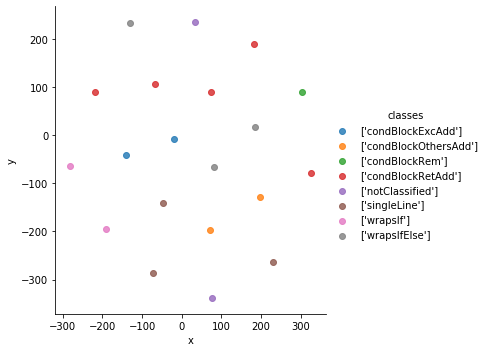

In [15]:
representations1 = visualization(model, defects4j_dataset, defects4j_classes, diffs_field)

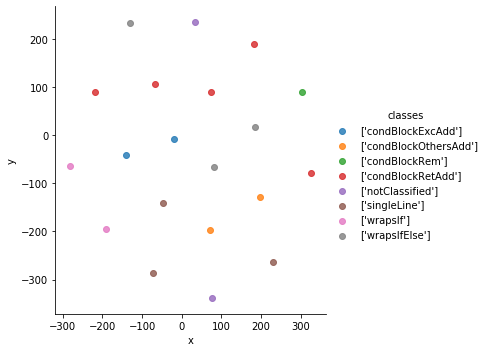

In [16]:
representations2 = visualization(model, defects4j_dataset, defects4j_classes, diffs_field)

In [10]:
print(representations1.shape)
print(representations2.shape)
torch.all(representations1 == representations2)

torch.Size([20, 1024])
torch.Size([20, 1024])


tensor(True)

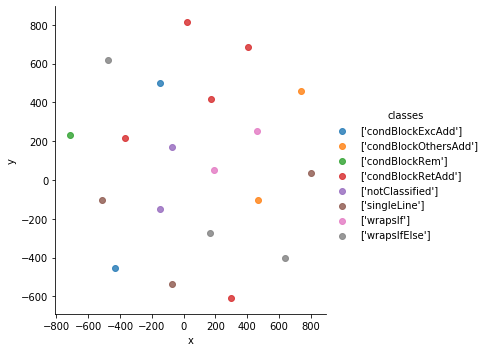

tensor([[-7.1191e-01,  8.0957e-03, -2.8204e-02,  ..., -7.3940e-03,
         -9.8486e-04,  1.8852e-03],
        [-8.1712e-01,  7.6494e-03, -2.7829e-02,  ..., -5.2626e-03,
         -1.8538e-04,  2.5696e-03],
        [-6.6940e-01,  7.4178e-03, -2.7310e-02,  ..., -2.0572e-02,
          1.6388e-03,  2.5715e-03],
        ...,
        [-7.3090e-01,  1.0865e-02, -1.5660e-02,  ..., -4.8336e-03,
         -8.7348e-04,  1.9063e-03],
        [-5.6894e-01,  7.2808e-03, -2.3685e-02,  ..., -9.4135e-03,
         -5.8357e-04,  1.9976e-03],
        [-7.0973e-01,  2.4050e-02, -1.4779e-02,  ..., -3.8035e-03,
         -5.6782e-04,  2.2715e-03]])

In [11]:
visualization(model, defects4j_dataset, defects4j_classes, diffs_field)

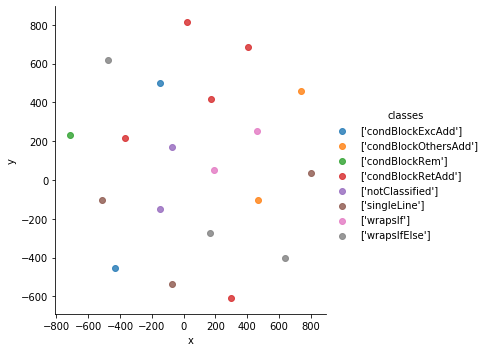

tensor([[-7.1191e-01,  8.0957e-03, -2.8204e-02,  ..., -7.3940e-03,
         -9.8486e-04,  1.8852e-03],
        [-8.1712e-01,  7.6494e-03, -2.7829e-02,  ..., -5.2626e-03,
         -1.8538e-04,  2.5696e-03],
        [-6.6940e-01,  7.4178e-03, -2.7310e-02,  ..., -2.0572e-02,
          1.6388e-03,  2.5715e-03],
        ...,
        [-7.3090e-01,  1.0865e-02, -1.5660e-02,  ..., -4.8336e-03,
         -8.7348e-04,  1.9063e-03],
        [-5.6894e-01,  7.2808e-03, -2.3685e-02,  ..., -9.4135e-03,
         -5.8357e-04,  1.9976e-03],
        [-7.0973e-01,  2.4050e-02, -1.4779e-02,  ..., -3.8035e-03,
         -5.6782e-04,  2.2715e-03]])

In [12]:
visualization(model, defects4j_dataset, defects4j_classes, diffs_field)

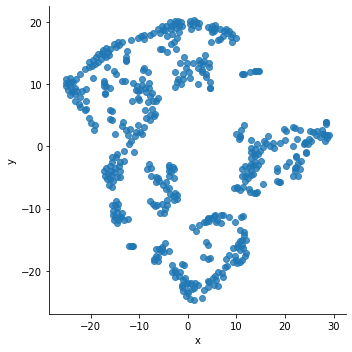

tensor([[-8.4524e-02,  3.3586e-03, -2.3228e-02,  ...,  9.1824e-03,
         -1.9427e-03,  2.8964e-03],
        [-5.8691e-03,  2.0505e-03, -2.1914e-02,  ..., -8.1180e-03,
         -1.7744e-03,  2.5179e-03],
        [ 5.8424e-01,  2.8601e-02,  9.5877e-02,  ...,  6.8093e-03,
         -1.7779e-03,  3.3568e-03],
        ...,
        [-8.8831e-04,  2.1231e-03, -2.5135e-02,  ...,  5.6890e-02,
         -2.1689e-04,  3.7377e-03],
        [-2.1566e-01,  6.7615e-03, -1.9898e-02,  ..., -7.1132e-03,
         -1.0167e-03,  1.9975e-03],
        [ 2.4822e-04,  2.4294e-03, -1.6830e-02,  ...,  9.5779e-03,
         -1.9288e-03,  2.8636e-03]])

In [17]:
visualization(model, Dataset(train_dataset[:500], train_dataset.fields), None, diffs_field)

In [52]:
def visualization_for_dataset(model: EncoderDecoder, dataset: Dataset, classes: List[str], diffs_field: Field) -> None:
    pad_index: int = diffs_field.vocab.stoi[CONFIG['PAD_TOKEN']]
    batch_size = len(dataset)

    def batch_comparator(x):
        return len(x.src), len(x.trg)

    iterator = data.Iterator(dataset, batch_size=batch_size,
                             sort=False, train=False,
                             sort_within_batch=True,
                             sort_key=batch_comparator, shuffle=False, device=CONFIG['DEVICE'])
    representations = torch.zeros(len(dataset), CONFIG['EDIT_REPRESENTATION_SIZE'] * 2)
    classes = np.array(classes)
    model.eval()
    with torch.no_grad():
        for i, batch in enumerate(iterator):
            batch = rebatch(pad_index, batch)
            sorted_args = h(list(map(batch_comparator, dataset[i: i + batch_size])))
            print(list(map(batch_comparator, dataset[i: i + batch_size])))
            print(sorted_args)
            classes[i: i + batch_size] = classes[sorted_args]
            representations[i: i + batch_size] = model.encode_edit(batch)[0][-1, :]  # hidden, last layer, all batches
        visualize_tsne(representations, [el for el in classes])

In [53]:
def h(seq):
    return sorted(range(len(seq)), key=seq.__getitem__)

In [55]:
sorted_args = h([(2, 2), (2, 1)])
print(sorted_args)

[1, 0]


[(72, 93), (40, 82), (68, 88), (19, 46), (96, 90), (68, 80), (18, 48), (38, 49), (88, 98), (70, 89), (87, 70), (68, 68), (20, 20), (94, 94), (93, 93), (44, 54), (47, 92), (20, 41), (57, 89), (16, 40)]
[19, 6, 3, 12, 17, 7, 1, 15, 16, 18, 11, 5, 2, 9, 0, 10, 8, 14, 13, 4]


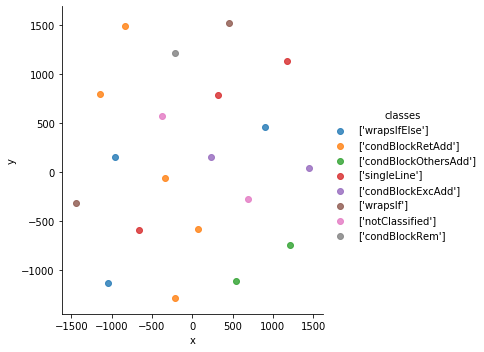

In [54]:
visualization_for_dataset(model, defects4j_dataset, defects4j_classes, diffs_field)

In [44]:
np.argsort(np.array([(2, 1), (1, 1), (1, 2), (0, 0)]))

array([[1, 0],
       [0, 1],
       [0, 1],
       [0, 1]])

In [39]:
np.array([(2, 1), (1, 1), (1, 2), (0, 0)])

array([[2, 1],
       [1, 1],
       [1, 2],
       [0, 0]])

In [56]:
h([(2, 2), (2, 1), (1, 2)])

[2, 1, 0]